### Libraries

In [1]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import os
import joblib

### Data Exctraction

In [2]:

def process_city_data(city_name, input_file, output_file):
    
    try:
        # Load the Excel file for the specified city
        df1 = pd.read_excel(input_file)
        
        # Process the 'new_car_detail' column to convert string representations of dictionaries into actual dictionaries
        df1['new_car_detail'] = df1['new_car_detail'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
        
        # Normalize the JSON data in the 'new_car_detail' column to create individual columns for each detail
        car_details_df = pd.json_normalize(df1['new_car_detail'])
        
        # Drop the columns that are not needed after extracting their details
        df1 = df1.drop(columns=['new_car_detail', 'new_car_feature', 'new_car_overview', 'new_car_specs', 'car_links'])
        
        # Concatenate the normalized car details back into the main DataFrame
        df1 = pd.concat([df1, car_details_df], axis=1)
        
        # Rename columns to more descriptive names
        df1.rename(columns={'it': 'Ignition type', 'ft': 'Fuel type', 'bt': 'Body type', 'km': 'Kilometers'}, inplace=True)
        
        # Process the second column of data (B column in Excel)
        df2 = pd.read_excel(input_file, usecols='B')
        processed_data_2 = []
        
        # Iterate through each row in the second column
        for index, row in df2.iterrows():
            cell_data = row.iloc[0]
            
            # Converting string representations of dictionaries into actual dictionaries
            if isinstance(cell_data, str):
                try:
                    cell_data = ast.literal_eval(cell_data)
                except ValueError:
                    continue
            
            # Extract relevant data if it is a dictionary and contains a 'top' key
            if isinstance(cell_data, dict) and 'top' in cell_data:
                flat_data = {item['key']: item['value'] for item in cell_data['top']}
                processed_data_2.append(flat_data)
        
        # Converting the processed data into a DataFrame
        final_df2 = pd.DataFrame(processed_data_2)
        
        # Process the third column of data (C column in Excel)
        df3 = pd.read_excel(input_file, usecols='C')
        processed_data_3 = []
        
        # Iterate through each row in the third column
        for index, row in df3.iterrows():
            cell_data = row.iloc[0]
            
            # Converting string representations of dictionaries into actual dictionaries
            if isinstance(cell_data, str):
                try:
                    cell_data = ast.literal_eval(cell_data)
                except ValueError:
                    continue
            
            # Extract relevant data if it is a dictionary and contains a 'top' key
            if isinstance(cell_data, dict) and 'top' in cell_data:
                flat_data = {item['value'] for item in cell_data['top']}
                processed_data_3.append(flat_data)
        
        # Converting the processed data into a DataFrame
        final_df3 = pd.DataFrame(processed_data_3)
        
        # Assign names to the columns of the third DataFrame
        final_df3.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9']
        
        # Process the fourth column of data (D column in Excel)
        df4 = pd.read_excel(input_file, usecols='D')
        processed_data_4 = []
        
        # Iterate through each row in the fourth column
        for index, row in df4.iterrows():
            cell_data = row.iloc[0]
            
            # Converting string representations of dictionaries into actual dictionaries
            if isinstance(cell_data, str):
                try:
                    cell_data = ast.literal_eval(cell_data)
                except ValueError:
                    continue
            
            # Extract relevant data if it is a dictionary and contains a 'top' key
            if isinstance(cell_data, dict) and 'top' in cell_data:
                flat_data = {item['key']: item['value'] for item in cell_data['top']}
                processed_data_4.append(flat_data)
        
        # Converting the processed data into a DataFrame
        final_df4 = pd.DataFrame(processed_data_4)
        
        # Process the fifth column of data (E column in Excel)
        df5 = pd.read_excel(input_file, usecols='E')
        
        # Concatenate all the processed DataFrames column-wise to form the final structured DataFrame
        city_df = pd.concat([df1, final_df2, final_df3, final_df4, df5], axis=1)
        
        # Add a new column to the DataFrame indicating the city name
        city_df['City'] = city_name
        
        # Save the final DataFrame to a CSV file
        city_df.to_csv(output_file, index=False)
        
        # Display a preview of the processed DataFrame for verification
        print(f"Processed data for {city_name}:")
        print(city_df.head())
        
        return city_df
    
    except Exception as e:
        # Catch any exceptions that occur during the processing and print an error message
        print(f"Error processing data for {city_name}: {e}")
        return None

# Define the input file paths and corresponding cities
cities = {
    'Bangalore': r"bangalore_cars.xlsx",
    'Chennai': r"chennai_cars.xlsx",
    'Delhi': r"delhi_cars.xlsx",
    'Hyderabad': r"hyderabad_cars.xlsx",
    'Jaipur': r"jaipur_cars.xlsx",
    'Kolkata': r"kolkata_cars.xlsx"  
}

# Define the directory where the output CSV files will be saved
output_dir = r"C:\Users\Praveen\Desktop\Car Dheko  Used Car Price Prediction"

# Process the data for each city by iterating through the defined cities and file paths
for city, input_file in cities.items():
    # Generate the output file path for each city
    output_file = os.path.join(output_dir, f"structured_data_{city.lower()}.csv")
    
    # Call the function to process the city's data and save it to a CSV file
    process_city_data(city, input_file, output_file)

Processed data for Bangalore:
   Ignition type Fuel type  Body type Kilometers transmission  ownerNo  \
0              0    Petrol  Hatchback   1,20,000       Manual        3   
1              0    Petrol        SUV     32,706       Manual        2   
2              0    Petrol  Hatchback     11,949       Manual        1   
3              0    Petrol      Sedan     17,794       Manual        1   
4              0    Diesel        SUV     60,000       Manual        1   

       owner      oem               model  modelYear  ...          Feature8  \
0  3rd Owner   Maruti      Maruti Celerio       2015  ...  Centeral Locking   
1  2nd Owner     Ford       Ford Ecosport       2018  ...            Heater   
2  1st Owner     Tata          Tata Tiago       2018  ...            Heater   
3  1st Owner  Hyundai       Hyundai Xcent       2014  ...            Heater   
4  1st Owner   Maruti  Maruti SX4 S Cross       2015  ...            Heater   

           Feature9     Mileage   Engine  Max Powe

### Data Cleaning

In [2]:
df_banglore = pd.read_csv('structured_data_bangalore.csv')
df_chennai = pd.read_csv('structured_data_chennai.csv')
df_delhi = pd.read_csv('structured_data_delhi.csv')
df_hyderabad = pd.read_csv('structured_data_hyderabad.csv')
df_jaipur = pd.read_csv('structured_data_jaipur.csv')
df_kolkata = pd.read_csv('structured_data_kolkata.csv')

In [3]:
df_all_cities = pd.concat((df_banglore,df_chennai,df_delhi,df_hyderabad,df_jaipur,df_kolkata))

In [4]:
df_all = df_all_cities.copy()

In [5]:
df_all.shape

(8369, 46)

In [6]:
df_all.isnull().sum()

Ignition type              0
Fuel type                  0
Body type                  4
Kilometers                 0
transmission               0
ownerNo                    0
owner                      0
oem                        0
model                      0
modelYear                  0
centralVariantId           0
variantName                0
price                      0
priceActual             6699
priceSaving             8369
priceFixedText          8369
trendingText.imgUrl        0
trendingText.heading       0
trendingText.desc          0
Registration Year         52
Insurance Validity         4
Fuel Type                  0
Seats                      6
Kms Driven                 2
RTO                      894
Ownership                 32
Engine Displacement        4
Transmission               0
Year of Manufacture       20
Feature1                  65
Feature2                  65
Feature3                  75
Feature4                  76
Feature5                  86
Feature6      

In [7]:
df_all['Ignition type'].value_counts()

Ignition type
0    8369
Name: count, dtype: int64

In [8]:
df_all.drop(columns=['Ignition type'],inplace=True)

In [9]:
df_all.head(2)

Fuel type  Body type Kilometers transmission  ownerNo      owner     oem  \
0    Petrol  Hatchback   1,20,000       Manual        3  3rd Owner  Maruti   
1    Petrol        SUV     32,706       Manual        2  2nd Owner    Ford   

            model  modelYear  centralVariantId  ...          Feature8  \
0  Maruti Celerio       2015              3979  ...  Centeral Locking   
1   Ford Ecosport       2018              6087  ...            Heater   

           Feature9    Mileage   Engine  Max Power Torque Seats.1 Wheel Size  \
0               NaN  23.1 kmpl   998 CC   67.04bhp   90Nm     5.0        NaN   
1  Centeral Locking    17 kmpl  1497 CC  121.31bhp  150Nm     5.0         16   

                                           car_links       City  
0  https://www.cardekho.com/used-car-details/used...  Bangalore  
1  https://www.cardekho.com/buy-used-car-details/...  Bangalore  

[2 rows x 45 columns]

In [10]:
df_all[['ownerNo','owner']]

ownerNo      owner
0           3  3rd Owner
1           2  2nd Owner
2           1  1st Owner
3           1  1st Owner
4           1  1st Owner
...       ...        ...
1376        1  1st Owner
1377        1  1st Owner
1378        3  3rd Owner
1379        1  1st Owner
1380        2  2nd Owner

[8369 rows x 2 columns]

In [11]:
df_all.drop(columns=['owner'],inplace=True)

In [12]:
df_all.head(2)

Fuel type  Body type Kilometers transmission  ownerNo     oem  \
0    Petrol  Hatchback   1,20,000       Manual        3  Maruti   
1    Petrol        SUV     32,706       Manual        2    Ford   

            model  modelYear  centralVariantId               variantName  ...  \
0  Maruti Celerio       2015              3979                       VXI  ...   
1   Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV  ...   

           Feature8          Feature9    Mileage   Engine  Max Power Torque  \
0  Centeral Locking               NaN  23.1 kmpl   998 CC   67.04bhp   90Nm   
1            Heater  Centeral Locking    17 kmpl  1497 CC  121.31bhp  150Nm   

  Seats.1 Wheel Size                                          car_links  \
0     5.0        NaN  https://www.cardekho.com/used-car-details/used...   
1     5.0         16  https://www.cardekho.com/buy-used-car-details/...   

        City  
0  Bangalore  
1  Bangalore  

[2 rows x 44 columns]

In [13]:
df_all[['priceSaving','priceFixedText']].isnull().sum()

priceSaving       8369
priceFixedText    8369
dtype: int64

In [14]:
df_all.drop(columns=['priceSaving','priceFixedText'],inplace=True)

In [15]:
df_all['priceActual'].isnull().sum()

6699

In [16]:
df_all.drop(columns=['priceActual'],inplace=True)

In [17]:
df_all['Insurance Validity'].value_counts()

Insurance Validity
Third Party insurance    4055
Comprehensive            3150
Third Party               630
Zero Dep                  303
Not Available             223
1                           3
2                           1
Name: count, dtype: int64

In [18]:
df_all[['Kilometers','Kms Driven']]

Kilometers    Kms Driven
0      1,20,000  1,20,000 Kms
1        32,706    32,706 Kms
2        11,949    11,949 Kms
3        17,794    17,794 Kms
4        60,000    60,000 Kms
...         ...           ...
1376     10,000    10,000 Kms
1377   1,20,000  1,20,000 Kms
1378     50,000    50,000 Kms
1379     40,000    40,000 Kms
1380   1,20,000  1,20,000 Kms

[8369 rows x 2 columns]

In [19]:
df_all.drop(columns=['Kms Driven'],inplace=True)

In [20]:
df_all[['Fuel type','Fuel Type']]

Fuel type Fuel Type
0       Petrol    Petrol
1       Petrol    Petrol
2       Petrol    Petrol
3       Petrol    Petrol
4       Diesel    Diesel
...        ...       ...
1376    Petrol    Petrol
1377    Petrol    Petrol
1378    Petrol    Petrol
1379    Petrol    Petrol
1380    Diesel    Diesel

[8369 rows x 2 columns]

In [21]:
df_all.drop(columns=['Fuel Type'],inplace=True)

In [22]:
df_all[['ownerNo','Ownership']]

ownerNo     Ownership
0           3   Third Owner
1           2  Second Owner
2           1   First Owner
3           1   First Owner
4           1   First Owner
...       ...           ...
1376        1   First Owner
1377        1   First Owner
1378        3   Third Owner
1379        1   First Owner
1380        2  Second Owner

[8369 rows x 2 columns]

In [23]:
df_all.drop(columns=['Ownership'],inplace=True)

In [24]:
df_all[['Engine Displacement','Engine']]

Engine Displacement   Engine
0                 998 cc   998 CC
1                1497 cc  1497 CC
2                1199 cc  1199 CC
3                1197 cc  1197 CC
4                1248 cc  1248 CC
...                  ...      ...
1376              998 cc   998 CC
1377              796 cc   796 CC
1378             1796 cc  1796 CC
1379             1197 cc  1197 CC
1380             1461 cc  1461 CC

[8369 rows x 2 columns]

In [25]:
df_all.drop(columns=['Engine'],inplace=True)

In [26]:
df_all[['transmission','Transmission']]

transmission Transmission
0          Manual       Manual
1          Manual       Manual
2          Manual       Manual
3          Manual       Manual
4          Manual       Manual
...           ...          ...
1376       Manual       Manual
1377       Manual       Manual
1378    Automatic    Automatic
1379       Manual       Manual
1380       Manual       Manual

[8369 rows x 2 columns]

In [27]:
df_all.drop(columns=['Transmission'],inplace=True)

In [28]:
df_all[['modelYear','Year of Manufacture']]

modelYear  Year of Manufacture
0          2015               2015.0
1          2018               2018.0
2          2018               2018.0
3          2014               2014.0
4          2015               2015.0
...         ...                  ...
1376       2022               2022.0
1377       2014               2014.0
1378       2011               2011.0
1379       2012               2012.0
1380       2017               2017.0

[8369 rows x 2 columns]

In [29]:
df_all.drop(columns=['Year of Manufacture'],inplace=True)

In [30]:
df_all[['Feature1', 'Feature2', 'Feature3', 'Feature4','Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9']]

Feature1                Feature2  \
0                             Child Safety Locks     Power Windows Front   
1                                      Cd Player     Power Windows Front   
2                                      Cd Player     Power Windows Front   
3                                      Cd Player     Power Windows Front   
4                            Power Windows Front  Adjustable Head Lights   
...                                          ...                     ...   
1376  Power Adjustable Exterior Rear View Mirror     Power Windows Front   
1377             Passenger Side Rear View Mirror     Power Windows Front   
1378                                Brake Assist               Cd Player   
1379                                   Cd Player     Power Windows Front   
1380                                Brake Assist               Cd Player   

                                           Feature3  \
0     Manually Adjustable Exterior Rear View Mirror   
1                            Adjustable Head Lights   
2                            Adjustable Head Lights   
3                            Adjustable Head Lights   
4                                  Fog Lights Front   
...                                             ...   
1376                         Adjustable Head Lights   
1377                     Day Night Rear View Mirror   
1378                            Power Windows Front   
1379                         Adjustable Head Lights   
1380                            Power Windows Front   

                                           Feature4                Feature5  \
0                            Adjustable Head Lights         Air Conditioner   
1                                  Fog Lights Front         Air Conditioner   
2                                  Fog Lights Front         Air Conditioner   
3                                  Fog Lights Front         Air Conditioner   
4                                   Air Conditioner                   Radio   
...                                             ...                     ...   
1376                                Air Conditioner                   Radio   
1377  Manually Adjustable Exterior Rear View Mirror  Adjustable Head Lights   
1378                         Adjustable Head Lights        Fog Lights Front   
1379                               Fog Lights Front         Air Conditioner   
1380                         Adjustable Head Lights        Fog Lights Front   

             Feature6                  Feature7                  Feature8  \
0      Power Steering                    Heater          Centeral Locking   
1      Power Steering  Anti Lock Braking System                    Heater   
2      Power Steering  Anti Lock Braking System                    Heater   
3      Power Steering  Anti Lock Braking System                    Heater   
4      Power Steering  Anti Lock Braking System                    Heater   
...               ...                       ...                       ...   
1376   Power Steering  Anti Lock Braking System                    Heater   
1377  Air Conditioner            Power Steering                    Heater   
1378  Air Conditioner            Power Steering  Anti Lock Braking System   
1379   Power Steering  Anti Lock Braking System                    Heater   
1380  Air Conditioner            Power Steering  Anti Lock Braking System   

              Feature9  
0                  NaN  
1     Centeral Locking  
2     Centeral Locking  
3     Centeral Locking  
4     Centeral Locking  
...                ...  
1376  Centeral Locking  
1377               NaN  
1378            Heater  
1379  Centeral Locking  
1380            Heater  

[8369 rows x 9 columns]

In [31]:
df_all['Mileage']

0        23.1 kmpl
1          17 kmpl
2       23.84 kmpl
3        19.1 kmpl
4       23.65 kmpl
           ...    
1376    25.24 kmpl
1377    22.74 kmpl
1378    11.74 kmpl
1379     18.5 kmpl
1380    19.72 kmpl
Name: Mileage, Length: 8369, dtype: object

In [32]:
df_all[['Max Power', 'Torque']]

Max Power    Torque
0      67.04bhp      90Nm
1     121.31bhp     150Nm
2         84bhp     114Nm
3      81.86bhp  113.75Nm
4       88.5bhp     200Nm
...         ...       ...
1376   65.71bhp      89Nm
1377    47.3bhp      69Nm
1378     186bhp     285Nm
1379   85.80bhp     114Nm
1380  108.45bhp     245Nm

[8369 rows x 2 columns]

In [33]:
df_all[['Seats','Seats.1']]

Seats  Seats.1
0     5 Seats      5.0
1     5 Seats      5.0
2     5 Seats      5.0
3     5 Seats      5.0
4     5 Seats      5.0
...       ...      ...
1376  5 Seats      5.0
1377  5 Seats      5.0
1378  5 Seats      5.0
1379  5 Seats      5.0
1380  5 Seats      5.0

[8369 rows x 2 columns]

In [34]:
df_all.drop(columns=['Seats'],inplace=True)

In [35]:
df_all['Wheel Size']

0       NaN
1        16
2        14
3        14
4        16
       ... 
1376    NaN
1377    NaN
1378     17
1379     14
1380     16
Name: Wheel Size, Length: 8369, dtype: object

In [36]:
df_all['Engine Displacement']

0        998 cc
1       1497 cc
2       1199 cc
3       1197 cc
4       1248 cc
         ...   
1376     998 cc
1377     796 cc
1378    1796 cc
1379    1197 cc
1380    1461 cc
Name: Engine Displacement, Length: 8369, dtype: object

In [37]:
df_all['Engine Displacement'] =df_all['Engine Displacement'].str.replace(' cc','',regex=False).astype(float)

In [38]:
df_all['Engine Displacement']

0        998.0
1       1497.0
2       1199.0
3       1197.0
4       1248.0
         ...  
1376     998.0
1377     796.0
1378    1796.0
1379    1197.0
1380    1461.0
Name: Engine Displacement, Length: 8369, dtype: float64

In [39]:
df_all[['Kilometers','Mileage', 'Max Power','Torque']]

Kilometers     Mileage  Max Power    Torque
0      1,20,000   23.1 kmpl   67.04bhp      90Nm
1        32,706     17 kmpl  121.31bhp     150Nm
2        11,949  23.84 kmpl      84bhp     114Nm
3        17,794   19.1 kmpl   81.86bhp  113.75Nm
4        60,000  23.65 kmpl    88.5bhp     200Nm
...         ...         ...        ...       ...
1376     10,000  25.24 kmpl   65.71bhp      89Nm
1377   1,20,000  22.74 kmpl    47.3bhp      69Nm
1378     50,000  11.74 kmpl     186bhp     285Nm
1379     40,000   18.5 kmpl   85.80bhp     114Nm
1380   1,20,000  19.72 kmpl  108.45bhp     245Nm

[8369 rows x 4 columns]

In [40]:
# Removing 'bhp' and Converting to numeric
df_all['Max Power'] = df_all['Max Power'].str.extract(r'(\d+\.?\d*)')[0]
df_all['Max Power'] = df_all['Max Power'].str.strip().astype(float)

# Removing 'kmpl' from 'Mileage' and Converting to numeric
df_all['Mileage'] = df_all['Mileage'].str.extract(r'(\d+\.?\d*)')[0]
df_all['Mileage'] = df_all['Mileage'].str.strip().astype(float)

# Removing commas and Converting 'Kilometers' to numeric
df_all['Kilometers'] = df_all['Kilometers'].str.replace(',', '').astype(float)

# Removing 'Nm' from 'Torque' and Converting to numeric
df_all['Torque'] = df_all['Torque'].str.extract(r'(\d+\.?\d*)')[0]
df_all['Torque'] = df_all['Torque'].str.strip().astype(float)

In [41]:
df_all['price'].unique()

array(['₹ 4 Lakh', '₹ 8.11 Lakh', '₹ 5.85 Lakh', ..., '₹ 1.58 Lakh',
       '₹ 35,000 ', '₹ 10.82 Lakh'], dtype=object)

In [42]:
def convert_prices(price):
    price = price.replace('â‚¹', '').replace('₹', '').replace(',', '').strip()
    if 'Lakh' in price:
        price = price.replace('Lakh', '').strip()
        return round(float(price) * 100000,2)
    elif 'Crore' in price:
        price = price.replace('Crore', '').strip()
        return round(float(price) * 10000000,2)
    return float(price)

df_all['price'] = df_all['price'].apply(convert_prices)

In [43]:
df_all['Registration Year']

0            2015
1        Feb 2018
2       Sept 2018
3        Dec 2014
4            2015
          ...    
1376         2022
1377         2014
1378         2011
1379         2012
1380         2017
Name: Registration Year, Length: 8369, dtype: object

In [44]:
# Removing 'months' from 'Registration Year' and Converting to numeric
df_all['Registration Year'] = df_all['Registration Year'].str.extract(r'(\d+\.?\d*)')[0]
df_all['Registration Year'] = df_all['Registration Year'].str.strip().astype(float)

In [45]:
df_all['Wheel Size'].value_counts()

Wheel Size
16     1500
15     1063
17      826
14      679
18      381
13      352
R16     142
19      109
12       85
R15      83
R17      57
20       43
R18      41
R14       9
R19       8
21        7
R20       1
Name: count, dtype: int64

In [46]:
df_all['ownerNo'].value_counts()

ownerNo
1    5882
2    1982
3     374
4      80
0      32
5      19
Name: count, dtype: int64

In [47]:
df_all['Seats.1'].value_counts()

Seats.1
5.0     7354
7.0      728
6.0      103
4.0       93
8.0       62
9.0       11
2.0        7
10.0       5
Name: count, dtype: int64

In [48]:
df_all[df_all['Seats.1'].isna()]

Fuel type  Body type  Kilometers transmission  ownerNo               oem  \
1175    Petrol  Hatchback     40000.0       Manual        3            Maruti   
628     Petrol        SUV     60000.0       Manual        2            Nissan   
343     Diesel        SUV    120000.0       Manual        2              Ford   
620     Petrol  Hatchback     70000.0       Manual        2            Maruti   
681     Petrol  Hatchback     50000.0       Manual        2            Maruti   
757     Diesel      Sedan    120000.0       Manual        1  Hindustan Motors   

               model  modelYear  centralVariantId           variantName  ...  \
1175   Maruti Estilo       2009              4079                   LXI  ...   
628     Nissan Kicks       2019              5943                Petrol  ...   
343   Ford Endeavour       2008               928  3.0 4x4 Thunder Plus  ...   
620    Maruti Estilo       2010              4079                   LXI  ...   
681    Maruti Estilo       2009              4079                   LXI  ...   
757       Ambassador       2014              6595           Encore BSIV  ...   

      Feature7 Feature8 Feature9 Mileage  Max Power Torque Seats.1  \
1175       NaN      NaN      NaN    19.5        NaN    NaN     NaN   
628        NaN      NaN      NaN     NaN     104.55  142.0     NaN   
343        NaN      NaN      NaN    11.4        NaN    NaN     NaN   
620        NaN      NaN      NaN    19.5        NaN    NaN     NaN   
681        NaN      NaN      NaN    19.5        NaN    NaN     NaN   
757        NaN      NaN      NaN    12.8      52.00  106.0     NaN   

      Wheel Size                                          car_links       City  
1175         NaN  https://www.cardekho.com/used-car-details/used...  Bangalore  
628          NaN  https://www.cardekho.com/used-car-details/used...      Delhi  
343          NaN  https://www.cardekho.com/used-car-details/used...     Jaipur  
620          NaN  https://www.cardekho.com/used-car-details/used...    Kolkata  
681          NaN  https://www.cardekho.com/used-car-details/used...    Kolkata  
757          NaN  https://www.cardekho.com/used-car-details/used...    Kolkata  

[6 rows x 34 columns]

In [49]:
df_all.dropna(subset=['Seats.1'], inplace=True)

In [50]:
df_all[df_all['Seats.1'].isna()]

Empty DataFrame
Columns: [Fuel type, Body type, Kilometers, transmission, ownerNo, oem, model, modelYear, centralVariantId, variantName, price, trendingText.imgUrl, trendingText.heading, trendingText.desc, Registration Year, Insurance Validity, RTO, Engine Displacement, Feature1, Feature2, Feature3, Feature4, Feature5, Feature6, Feature7, Feature8, Feature9, Mileage, Max Power, Torque, Seats.1, Wheel Size, car_links, City]
Index: []

[0 rows x 34 columns]

In [52]:
df_all['Seats.1'].value_counts()

Seats.1
5.0     7354
7.0      728
6.0      103
4.0       93
8.0       62
9.0       11
2.0        7
10.0       5
Name: count, dtype: int64

In [53]:
df_all['Insurance Validity'].value_counts()

Insurance Validity
Third Party insurance    4049
Comprehensive            3150
Third Party               630
Zero Dep                  303
Not Available             223
1                           3
2                           1
Name: count, dtype: int64

In [54]:
df_all['Insurance Validity'] = df_all['Insurance Validity'].replace({'Third Party': 'Third Party insurance'})

In [55]:
df_all['Fuel type'].value_counts()

Fuel type
Petrol      5550
Diesel      2671
Cng           98
Electric      28
Lpg           16
Name: count, dtype: int64

In [56]:
df_all = df_all[df_all['Fuel type'] != 'Electric']


In [57]:
df_all['Fuel type'].value_counts()

Fuel type
Petrol    5550
Diesel    2671
Cng         98
Lpg         16
Name: count, dtype: int64

In [58]:
df_all.columns

Index(['Fuel type', 'Body type', 'Kilometers', 'transmission', 'ownerNo',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'trendingText.imgUrl', 'trendingText.heading', 'trendingText.desc',
       'Registration Year', 'Insurance Validity', 'RTO', 'Engine Displacement',
       'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
       'Feature7', 'Feature8', 'Feature9', 'Mileage', 'Max Power', 'Torque',
       'Seats.1', 'Wheel Size', 'car_links', 'City'],
      dtype='object')

In [59]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8335 entries, 0 to 1380
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fuel type             8335 non-null   object 
 1   Body type             8331 non-null   object 
 2   Kilometers            8335 non-null   float64
 3   transmission          8335 non-null   object 
 4   ownerNo               8335 non-null   int64  
 5   oem                   8335 non-null   object 
 6   model                 8335 non-null   object 
 7   modelYear             8335 non-null   int64  
 8   centralVariantId      8335 non-null   int64  
 9   variantName           8335 non-null   object 
 10  price                 8335 non-null   float64
 11  trendingText.imgUrl   8335 non-null   object 
 12  trendingText.heading  8335 non-null   object 
 13  trendingText.desc     8335 non-null   object 
 14  Registration Year     8284 non-null   float64
 15  Insurance Validity    8331

In [60]:
# Removing unnecessary features

df_all = df_all.drop(columns=['trendingText.imgUrl', 'trendingText.heading', 'trendingText.desc','Feature1', 'Feature2', 'Feature3',
       'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9', 'car_links'])

In [61]:
df_all.head(2)

Fuel type  Body type  Kilometers transmission  ownerNo     oem  \
0    Petrol  Hatchback    120000.0       Manual        3  Maruti   
1    Petrol        SUV     32706.0       Manual        2    Ford   

            model  modelYear  centralVariantId               variantName  ...  \
0  Maruti Celerio       2015              3979                       VXI  ...   
1   Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV  ...   

   Registration Year     Insurance Validity   RTO Engine Displacement  \
0             2015.0  Third Party insurance  KA51               998.0   
1             2018.0          Comprehensive  KA05              1497.0   

   Mileage  Max Power  Torque  Seats.1  Wheel Size       City  
0     23.1      67.04    90.0      5.0         NaN  Bangalore  
1     17.0     121.31   150.0      5.0          16  Bangalore  

[2 rows x 21 columns]

In [62]:
df_all.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380],
      dtype='int64', length=8335)

In [63]:
df_all.reset_index(drop=True, inplace=True)

In [64]:
df_all.columns

Index(['Fuel type', 'Body type', 'Kilometers', 'transmission', 'ownerNo',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'Registration Year', 'Insurance Validity', 'RTO', 'Engine Displacement',
       'Mileage', 'Max Power', 'Torque', 'Seats.1', 'Wheel Size', 'City'],
      dtype='object')

In [65]:
df_all.rename(columns={'Fuel type':'FuelType','Body type':'BodyType','transmission':'Transmission','ownerNo': 'OwnerNo',
                       'oem':'Oem','model':'Model','modelYear':'ModelYear','centralVariantId':'CentralVariantId',
                       'variantName':'VariantName','Seats.1':'Seats','price':'Price','Insurance Validity':'InsuranceValidity',
                       'Max Power': 'MaxPower','Engine Displacement':'EngineDisplacement','Wheel Size':'WheelSize'},inplace=True)

In [66]:
df_all = df_all[['FuelType', 'BodyType', 'Kilometers', 'Transmission', 'OwnerNo', 'Oem',
       'Model', 'ModelYear', 'CentralVariantId', 'VariantName', 'Registration Year', 'InsuranceValidity', 'RTO', 'EngineDisplacement',
       'Mileage', 'MaxPower', 'Torque', 'Seats', 'WheelSize', 'City','Price']]

In [67]:
df_all.head(2)

FuelType   BodyType  Kilometers Transmission  OwnerNo     Oem  \
0   Petrol  Hatchback    120000.0       Manual        3  Maruti   
1   Petrol        SUV     32706.0       Manual        2    Ford   

            Model  ModelYear  CentralVariantId               VariantName  ...  \
0  Maruti Celerio       2015              3979                       VXI  ...   
1   Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV  ...   

       InsuranceValidity   RTO EngineDisplacement  Mileage  MaxPower  Torque  \
0  Third Party insurance  KA51              998.0     23.1     67.04    90.0   
1          Comprehensive  KA05             1497.0     17.0    121.31   150.0   

   Seats  WheelSize       City     Price  
0    5.0        NaN  Bangalore  400000.0  
1    5.0         16  Bangalore  811000.0  

[2 rows x 21 columns]

In [68]:
df_all_numeric = df_all.select_dtypes(include=np.number)
df_all_categorical = df_all.select_dtypes(exclude=np.number)

In [69]:
df_all_numeric.shape , df_all_categorical.shape

((8335, 11), (8335, 10))

In [70]:
df_all_numeric.isnull().sum()

Kilometers              0
OwnerNo                 0
ModelYear               0
CentralVariantId        0
Registration Year      51
EngineDisplacement      3
Mileage               260
MaxPower               56
Torque                 56
Seats                   0
Price                   0
dtype: int64

In [71]:
df_all_categorical.isnull().sum()

FuelType                0
BodyType                4
Transmission            0
Oem                     0
Model                   0
VariantName             0
InsuranceValidity       4
RTO                   887
WheelSize            2969
City                    0
dtype: int64

In [72]:
#Handling Missing Values in Numerical Columns with Mean

for cols in df_all_numeric.columns:
    df_all[cols] = df_all[cols].fillna(df_all[cols].mean())

In [73]:
#Handling Missing Values in Catogorical Columns with Mode

for cols in df_all_categorical.columns:
    df_all[cols] = df_all[cols].fillna(df_all[cols].mode()[0])

In [74]:
for cols in df_all_numeric.columns:
    print(cols,':',df_all[cols].isnull().sum())

Kilometers : 0
OwnerNo : 0
ModelYear : 0
CentralVariantId : 0
Registration Year : 0
EngineDisplacement : 0
Mileage : 0
MaxPower : 0
Torque : 0
Seats : 0
Price : 0


In [75]:
for cols in df_all_categorical.columns:
    print(cols,':',df_all[cols].isnull().sum())

FuelType : 0
BodyType : 0
Transmission : 0
Oem : 0
Model : 0
VariantName : 0
InsuranceValidity : 0
RTO : 0
WheelSize : 0
City : 0


### Outlier Treatment

In [76]:
df_all.head(2)

FuelType   BodyType  Kilometers Transmission  OwnerNo     Oem  \
0   Petrol  Hatchback    120000.0       Manual        3  Maruti   
1   Petrol        SUV     32706.0       Manual        2    Ford   

            Model  ModelYear  CentralVariantId               VariantName  ...  \
0  Maruti Celerio       2015              3979                       VXI  ...   
1   Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV  ...   

       InsuranceValidity   RTO EngineDisplacement  Mileage  MaxPower  Torque  \
0  Third Party insurance  KA51              998.0     23.1     67.04    90.0   
1          Comprehensive  KA05             1497.0     17.0    121.31   150.0   

   Seats  WheelSize       City     Price  
0    5.0         16  Bangalore  400000.0  
1    5.0         16  Bangalore  811000.0  

[2 rows x 21 columns]

In [77]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8335 entries, 0 to 8334
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FuelType            8335 non-null   object 
 1   BodyType            8335 non-null   object 
 2   Kilometers          8335 non-null   float64
 3   Transmission        8335 non-null   object 
 4   OwnerNo             8335 non-null   int64  
 5   Oem                 8335 non-null   object 
 6   Model               8335 non-null   object 
 7   ModelYear           8335 non-null   int64  
 8   CentralVariantId    8335 non-null   int64  
 9   VariantName         8335 non-null   object 
 10  Registration Year   8335 non-null   float64
 11  InsuranceValidity   8335 non-null   object 
 12  RTO                 8335 non-null   object 
 13  EngineDisplacement  8335 non-null   float64
 14  Mileage             8335 non-null   float64
 15  MaxPower            8335 non-null   float64
 16  Torque

#### IQR method

In [78]:
df_all.head(2)

FuelType   BodyType  Kilometers Transmission  OwnerNo     Oem  \
0   Petrol  Hatchback    120000.0       Manual        3  Maruti   
1   Petrol        SUV     32706.0       Manual        2    Ford   

            Model  ModelYear  CentralVariantId               VariantName  ...  \
0  Maruti Celerio       2015              3979                       VXI  ...   
1   Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV  ...   

       InsuranceValidity   RTO EngineDisplacement  Mileage  MaxPower  Torque  \
0  Third Party insurance  KA51              998.0     23.1     67.04    90.0   
1          Comprehensive  KA05             1497.0     17.0    121.31   150.0   

   Seats  WheelSize       City     Price  
0    5.0         16  Bangalore  400000.0  
1    5.0         16  Bangalore  811000.0  

[2 rows x 21 columns]

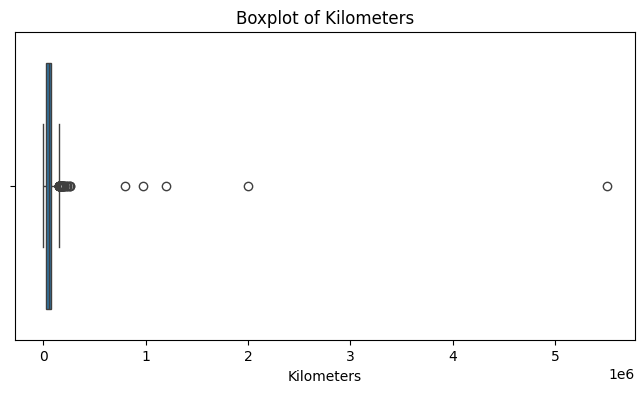

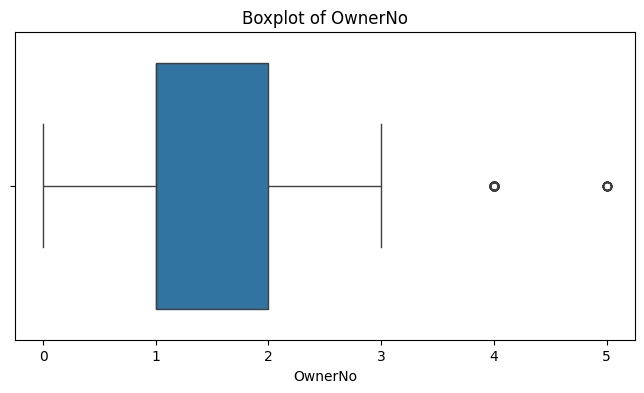

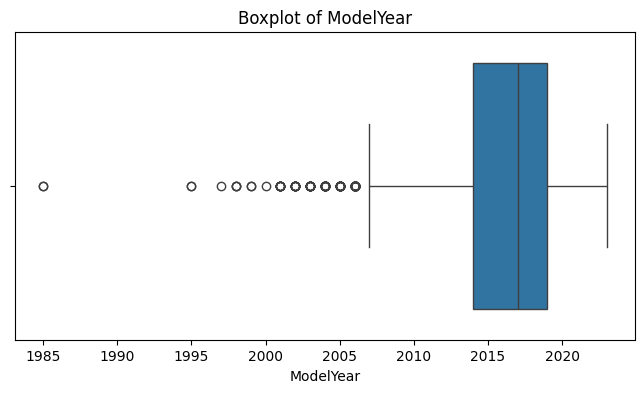

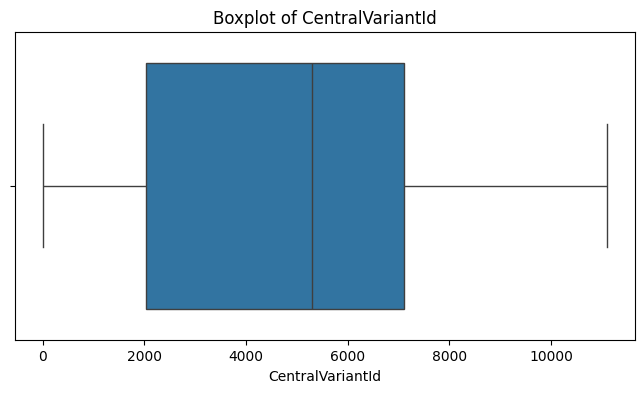

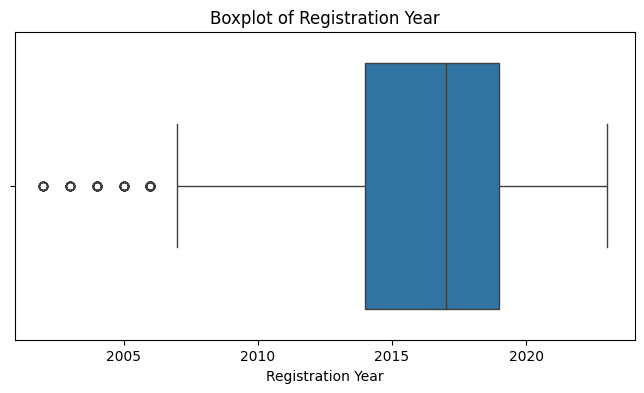

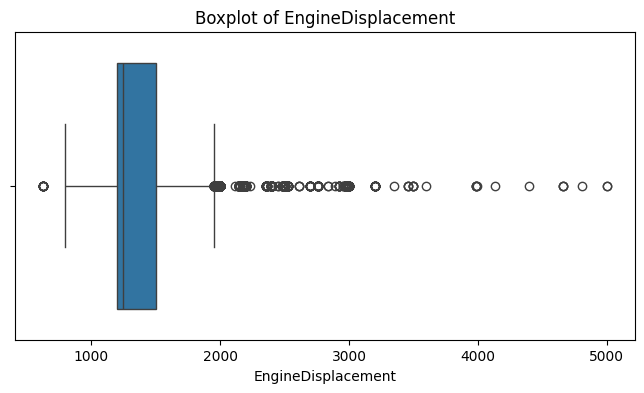

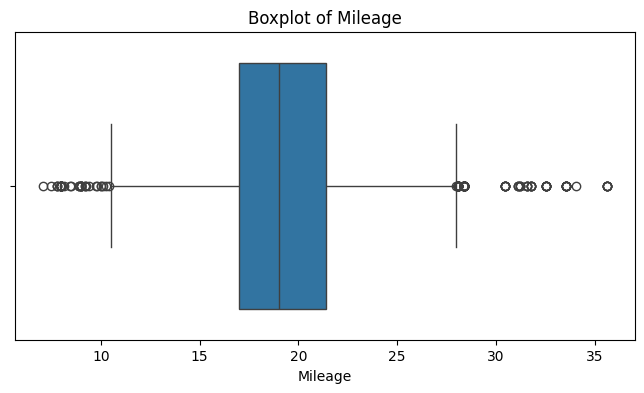

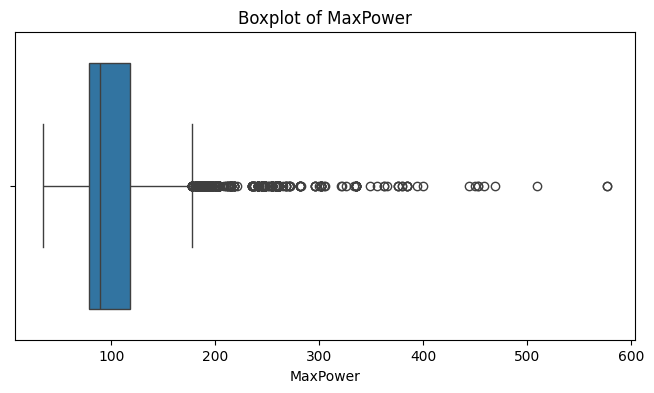

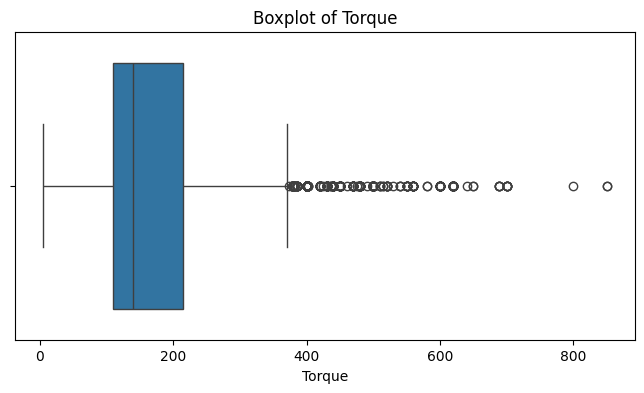

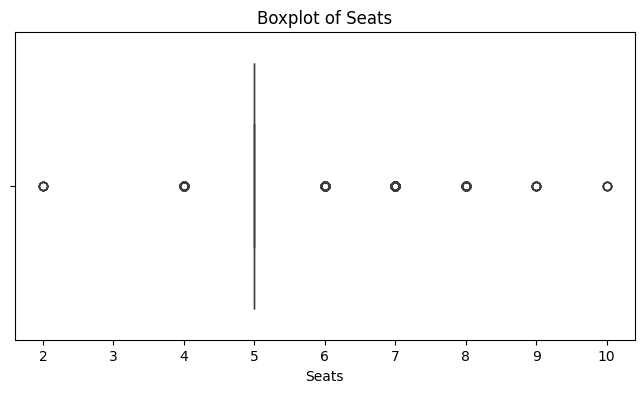

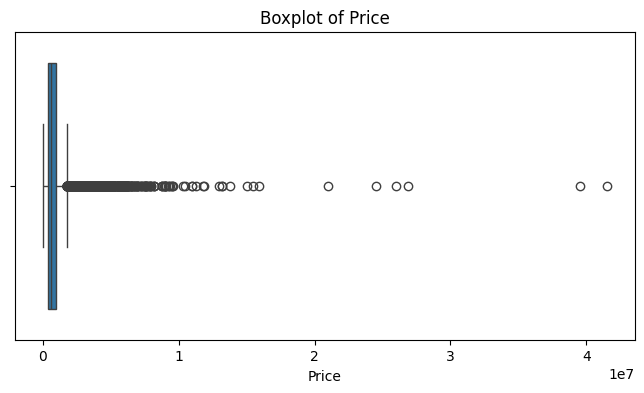

In [79]:
for cols in df_all_numeric:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_all, x=cols)
    plt.title(f'Boxplot of {cols}')
    plt.show()

In [80]:
df_all[df_all['Kilometers'] > 500000]

FuelType BodyType  Kilometers Transmission  OwnerNo            Oem  \
1530   Diesel      MUV    800000.0       Manual        1         Toyota   
1531   Diesel    Sedan   5500000.0    Automatic        1  Mercedes-Benz   
1988   Diesel      SUV   1200000.0       Manual        1       Mahindra   
2671   Diesel      MUV   2000022.0       Manual        1         Toyota   
7584   Petrol      SUV    975000.0       Manual        1            Kia   

                      Model  ModelYear  CentralVariantId         VariantName  \
1530   Toyota Innova Crysta       2018              2410   2.4 VX MT 8S BSIV   
1531  Mercedes-Benz C-Class       2018              4699     C 220 CDI Style   
1988       Mahindra Scorpio       2019              7764                  S5   
2671   Toyota Innova Crysta       2017              7313           2.4 VX MT   
7584              Kia Sonet       2021              8006  HTX Turbo iMT BSVI   

      ...      InsuranceValidity   RTO EngineDisplacement    Mileage  \
1530  ...          Comprehensive  TN07             2393.0  13.680000   
1531  ...          Comprehensive  TN04             2143.0  19.270000   
1988  ...          Comprehensive  TN09             2179.0  19.231344   
2671  ...          Comprehensive  TN22             2393.0  13.680000   
7584  ...  Third Party insurance  WB74              998.0  18.200000   

      MaxPower  Torque  Seats  WheelSize     City      Price  
1530    147.80   343.0    8.0         16  Chennai  2150000.0  
1531    167.62   400.0    5.0         16  Chennai  3600000.0  
1988    136.78   319.0    7.0         16  Chennai  1150000.0  
2671    147.51   343.0    7.0         16  Chennai  1750000.0  
7584    118.36   172.0    5.0         16  Kolkata   975000.0  

[5 rows x 21 columns]

In [81]:
df_all = df_all[df_all['Kilometers'] < 500000]

In [82]:
df_all[df_all['ModelYear'] == 1985]

FuelType   BodyType  Kilometers Transmission  OwnerNo               Oem  \
5188   Petrol  Hatchback     50000.0       Manual        2            Maruti   
7038   Petrol      Sedan     80000.0       Manual        1  Hindustan Motors   

           Model  ModelYear  CentralVariantId          VariantName  ...  \
5188  Maruti 800       1985              3879                   DX  ...   
7038  Ambassador       1985              1125  Classic Nova Petrol  ...   

          InsuranceValidity   RTO EngineDisplacement  Mileage  MaxPower  \
5188  Third Party insurance  WB02              796.0     16.1      37.0   
7038          Comprehensive  WB02             1817.0     12.8      75.0   

      Torque  Seats  WheelSize       City     Price  
5188    59.0    4.0         12  Hyderabad  160000.0  
7038   130.0    5.0         15    Kolkata  495000.0  

[2 rows x 21 columns]

In [83]:
df_all[df_all['ModelYear'] < 2005]

FuelType   BodyType  Kilometers Transmission  OwnerNo       Oem  \
487    Petrol        SUV     10000.0       Manual        3    Maruti   
490    Petrol        SUV     10000.0       Manual        3    Maruti   
582    Petrol   Minivans     80000.0       Manual        5    Maruti   
622    Petrol      Sedan     90000.0    Automatic        1     Honda   
632    Petrol  Hatchback     80000.0       Manual        2   Hyundai   
...       ...        ...         ...          ...      ...       ...   
7732   Petrol  Hatchback     50000.0       Manual        2    Maruti   
8013   Petrol  Hatchback     30000.0       Manual        1    Maruti   
8132   Petrol  Hatchback     30000.0       Manual        1    Maruti   
8269   Diesel        SUV     52000.0       Manual        1  Mahindra   
8326   Petrol  Hatchback     30000.0       Manual        3    Maruti   

                 Model  ModelYear  CentralVariantId  VariantName  ...  \
487       Maruti Gypsy       1995              4099    MG410W ST  ...   
490       Maruti Gypsy       1995              4100    MG410W HT  ...   
582        Maruti Omni       1998              4130    5 Str STD  ...   
622         Honda City       2004              1243  1.5 GXI CVT  ...   
632     Hyundai Santro       2003              1696   LS zipPlus  ...   
...                ...        ...               ...          ...  ...   
7732        Maruti Zen       2002              4391          LXI  ...   
8013        Maruti Zen       2003              4389      LX BSII  ...   
8132       Maruti Alto       2004              3915           LX  ...   
8269  Mahindra Scorpio       2003              3668      2.6 SLX  ...   
8326        Maruti 800       2002              3887          Std  ...   

          InsuranceValidity   RTO EngineDisplacement    Mileage    MaxPower  \
487   Third Party insurance  WB02        1429.214474  19.231344  105.136049   
490   Third Party insurance  KA18        1429.214474  19.231344  105.136049   
582   Third Party insurance  WB02         796.000000  14.000000   35.000000   
622   Third Party insurance  KA03        1493.000000  14.500000  100.000000   
632   Third Party insurance  WB02        1086.000000  19.231344  105.136049   
...                     ...   ...                ...        ...         ...   
7732  Third Party insurance  WB38         993.000000  17.300000   60.000000   
8013  Third Party insurance  WB40         993.000000  17.300000   60.000000   
8132  Third Party insurance  WB02         796.000000  19.700000   46.300000   
8269          Comprehensive  WB02        2179.000000  10.500000  120.000000   
8326  Third Party insurance  WB02         796.000000  16.100000   37.000000   

          Torque  Seats  WheelSize       City     Price  
487   177.628551    6.0         15  Bangalore  400000.0  
490   177.628551    8.0         16  Bangalore  400000.0  
582     6.100000    5.0         12  Bangalore   58000.0  
622    13.100000    5.0         14  Bangalore  160000.0  
632   177.628551    5.0         13  Bangalore  110000.0  
...          ...    ...        ...        ...       ...  
7732   78.000000    5.0         16    Kolkata   48000.0  
8013   78.000000    5.0         16    Kolkata   50000.0  
8132   62.000000    5.0         12    Kolkata   45000.0  
8269  290.000000    8.0         16    Kolkata  250000.0  
8326   59.000000    4.0         12    Kolkata  100000.0  

[68 rows x 21 columns]

In [84]:
df_all[df_all['Registration Year'] < 2005]

FuelType   BodyType  Kilometers Transmission  OwnerNo            Oem  \
622    Petrol      Sedan     90000.0    Automatic        1          Honda   
632    Petrol  Hatchback     80000.0       Manual        2        Hyundai   
653    Petrol      Sedan    100000.0       Manual        3         Toyota   
670    Diesel  Hatchback     50000.0       Manual        1           Tata   
713    Petrol  Hatchback    100000.0       Manual        4         Maruti   
732    Petrol      Sedan     70000.0       Manual        1           Opel   
753    Petrol      Sedan     80000.0       Manual        2           Ford   
834    Petrol      Sedan    110000.0       Manual        2           Opel   
857    Petrol      Sedan    120000.0       Manual        4           Opel   
881    Petrol      Sedan     80000.0       Manual        2           Ford   
884    Petrol      Sedan     80000.0       Manual        2           Ford   
896    Petrol      Sedan     90000.0       Manual        3         Maruti   
995    Petrol      Sedan     30000.0       Manual        3          Honda   
1048   Diesel      Sedan    120000.0       Manual        5     Mitsubishi   
1066   Petrol      Sedan     80000.0       Manual        2           Ford   
1751   Petrol  Hatchback    120000.0       Manual        3        Hyundai   
1845   Petrol  Hatchback     20000.0       Manual        1         Maruti   
1983   Diesel  Hatchback    120000.0       Manual        2           Tata   
2187   Petrol      Sedan     60000.0       Manual        3           Ford   
2212   Petrol  Hatchback     60000.0       Manual        1         Maruti   
2491   Petrol   Minivans     90000.0       Manual        3         Maruti   
2500   Petrol      Sedan    150000.0       Manual        1     Mitsubishi   
2704   Petrol      Sedan     85037.0    Automatic        3          Honda   
4583   Diesel        SUV    260000.0       Manual        1         Toyota   
4674   Petrol        SUV     15600.0       Manual        3         Maruti   
4864   Diesel        SUV    120000.0       Manual        1       Mahindra   
4872   Petrol      Sedan     40000.0    Automatic        3        Hyundai   
5032   Petrol      Sedan     40000.0    Automatic        3        Hyundai   
5151   Diesel  Hatchback    148914.0       Manual        2           Tata   
5457   Petrol  Hatchback     99750.0       Manual        2        Hyundai   
5493   Petrol      Sedan    135000.0       Manual        1  Mercedes-Benz   
5550   Petrol  Hatchback    131561.0       Manual        5        Hyundai   
5554   Diesel      Sedan    120000.0       Manual        2        Hyundai   
5621   Petrol  Hatchback    120000.0       Manual        2        Hyundai   
5632   Petrol        MUV     70000.0       Manual        3           Tata   
5705   Petrol      Sedan    100000.0       Manual        2           Ford   
5783   Petrol  Hatchback     80000.0       Manual        2         Maruti   
5807   Petrol  Hatchback     80000.0       Manual        2         Maruti   
6728   Petrol  Hatchback     80000.0       Manual        2         Maruti   
6745   Petrol  Hatchback     80000.0       Manual        4         Maruti   
6780   Petrol  Hatchback     70000.0       Manual        4         Maruti   
6956   Petrol  Hatchback    150000.0       Manual        1         Maruti   
7724   Petrol  Hatchback    150000.0       Manual        2         Maruti   
7732   Petrol  Hatchback     50000.0       Manual        2         Maruti   
8013   Petrol  Hatchback     30000.0       Manual        1         Maruti   
8132   Petrol  Hatchback     30000.0       Manual        1         Maruti   
8269   Diesel        SUV     52000.0       Manual        1       Mahindra   
8326   Petrol  Hatchback     30000.0       Manual        3         Maruti   

                      Model  ModelYear  CentralVariantId         VariantName  \
622              Honda City       2004              1243         1.5 GXI CVT   
632          Hyundai Santro       2003              1696          LS zi

In [85]:
df_all[df_all['EngineDisplacement'] < 500]

Empty DataFrame
Columns: [FuelType, BodyType, Kilometers, Transmission, OwnerNo, Oem, Model, ModelYear, CentralVariantId, VariantName, Registration Year, InsuranceValidity, RTO, EngineDisplacement, Mileage, MaxPower, Torque, Seats, WheelSize, City, Price]
Index: []

[0 rows x 21 columns]

Dropping the above records where the EngineDisplacement is less than 500

In [86]:
df_all = df_all[df_all['EngineDisplacement'] > 500]

In [87]:
df_all[df_all['Mileage'] > 50]

Empty DataFrame
Columns: [FuelType, BodyType, Kilometers, Transmission, OwnerNo, Oem, Model, ModelYear, CentralVariantId, VariantName, Registration Year, InsuranceValidity, RTO, EngineDisplacement, Mileage, MaxPower, Torque, Seats, WheelSize, City, Price]
Index: []

[0 rows x 21 columns]

In [88]:
df_all[df_all['Mileage'] < 7]

Empty DataFrame
Columns: [FuelType, BodyType, Kilometers, Transmission, OwnerNo, Oem, Model, ModelYear, CentralVariantId, VariantName, Registration Year, InsuranceValidity, RTO, EngineDisplacement, Mileage, MaxPower, Torque, Seats, WheelSize, City, Price]
Index: []

[0 rows x 21 columns]

In [89]:
df_all = df_all[df_all['Mileage'] < 50]

In [90]:
df_all[df_all['MaxPower'] > 500]

FuelType BodyType  Kilometers Transmission  OwnerNo            Oem  \
3190   Petrol      SUV      4000.0    Automatic        1  Mercedes-Benz   
3374   Petrol      SUV      3500.0    Automatic        1  Mercedes-Benz   
7426   Petrol    Coupe     30000.0    Automatic        1  Mercedes-Benz   

                       Model  ModelYear  CentralVariantId       VariantName  \
3190  Mercedes-Benz AMG G 63       2022              8591  4MATIC 2018-2023   
3374  Mercedes-Benz AMG G 63       2023              8591  4MATIC 2018-2023   
7426    Mercedes-Benz AMG GT       2016              4533                 S   

      ...      InsuranceValidity   RTO EngineDisplacement    Mileage  \
3190  ...          Comprehensive  HR26             3982.0  19.231344   
3374  ...          Comprehensive  HP05             3982.0  19.231344   
7426  ...  Third Party insurance  WB02             3982.0  12.650000   

      MaxPower  Torque  Seats  WheelSize     City       Price  
3190    576.63   850.0    5.0         16    Delhi  39500000.0  
3374    576.63   850.0    5.0         16    Delhi  41500000.0  
7426    510.00   650.0    2.0         19  Kolkata  21000000.0  

[3 rows x 21 columns]

In [91]:
df_all[df_all['Torque'] > 700]

FuelType BodyType  Kilometers Transmission  OwnerNo            Oem  \
2126   Diesel      SUV    120000.0    Automatic        2           Audi   
3190   Petrol      SUV      4000.0    Automatic        1  Mercedes-Benz   
3374   Petrol      SUV      3500.0    Automatic        1  Mercedes-Benz   

                       Model  ModelYear  CentralVariantId  \
2126                 Audi Q7       2012               130   
3190  Mercedes-Benz AMG G 63       2022              8591   
3374  Mercedes-Benz AMG G 63       2023              8591   

                     VariantName  ...      InsuranceValidity   RTO  \
2126  4.2 TDI Quattro Technology  ...  Third Party insurance  TN22   
3190            4MATIC 2018-2023  ...          Comprehensive  HR26   
3374            4MATIC 2018-2023  ...          Comprehensive  HP05   

     EngineDisplacement    Mileage  MaxPower  Torque  Seats  WheelSize  \
2126             4134.0  11.330000    335.20   800.0    7.0         19   
3190             3982.0  19.231344    576.63   850.0    5.0         16   
3374             3982.0  19.231344    576.63   850.0    5.0         16   

         City       Price  
2126  Chennai   1500000.0  
3190    Delhi  39500000.0  
3374    Delhi  41500000.0  

[3 rows x 21 columns]

In [92]:
df_all[df_all['Price'] > 30000000]

FuelType BodyType  Kilometers Transmission  OwnerNo            Oem  \
3190   Petrol      SUV      4000.0    Automatic        1  Mercedes-Benz   
3374   Petrol      SUV      3500.0    Automatic        1  Mercedes-Benz   

                       Model  ModelYear  CentralVariantId       VariantName  \
3190  Mercedes-Benz AMG G 63       2022              8591  4MATIC 2018-2023   
3374  Mercedes-Benz AMG G 63       2023              8591  4MATIC 2018-2023   

      ...  InsuranceValidity   RTO EngineDisplacement    Mileage  MaxPower  \
3190  ...      Comprehensive  HR26             3982.0  19.231344    576.63   
3374  ...      Comprehensive  HP05             3982.0  19.231344    576.63   

      Torque  Seats  WheelSize   City       Price  
3190   850.0    5.0         16  Delhi  39500000.0  
3374   850.0    5.0         16  Delhi  41500000.0  

[2 rows x 21 columns]

In [93]:
# for cols in df_all_numeric:
#     q1 = np.percentile(df_all[cols],25)
#     q3 = np.percentile(df_all[cols],75)
#     IQR = q3 - q1
#     Max = q3 + 1.5 * IQR
#     Min = q1 - 1.5 * IQR
#     upper_outliers = np.where(df_all[cols] >= Max)
#     lower_outliers = np.where(df_all[cols] <= Min)
#     df_all[cols] = np.where(df_all[cols] > Max, Max, np.where(df_all[cols] < Min, Min, df_all[cols]))

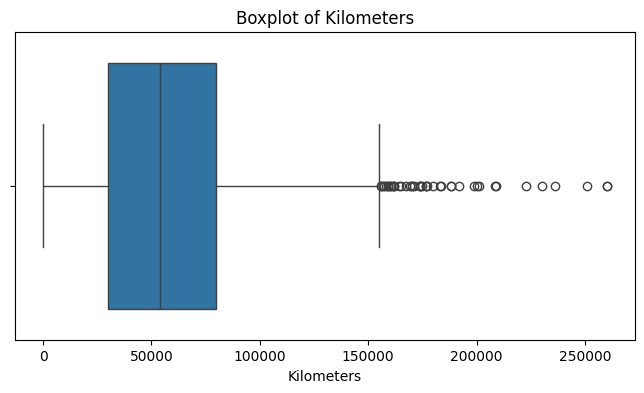

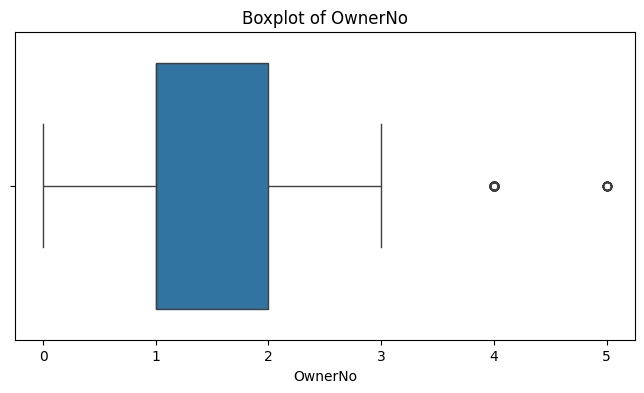

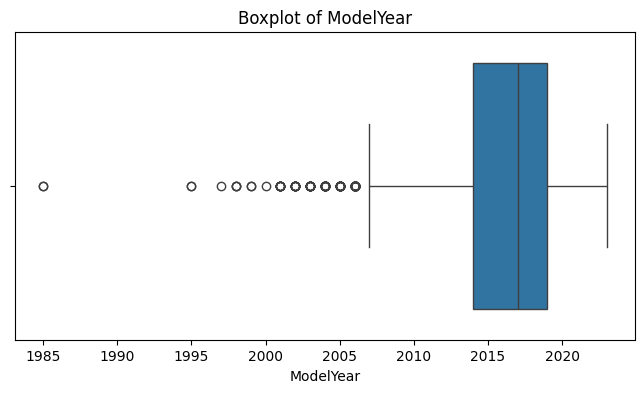

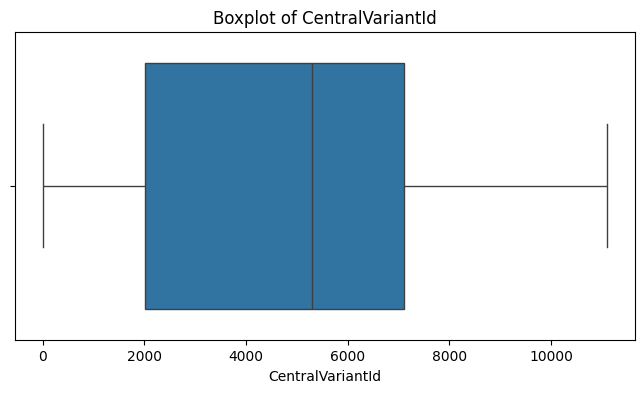

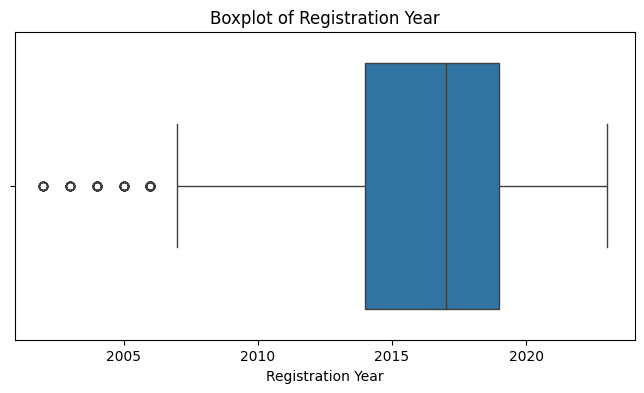

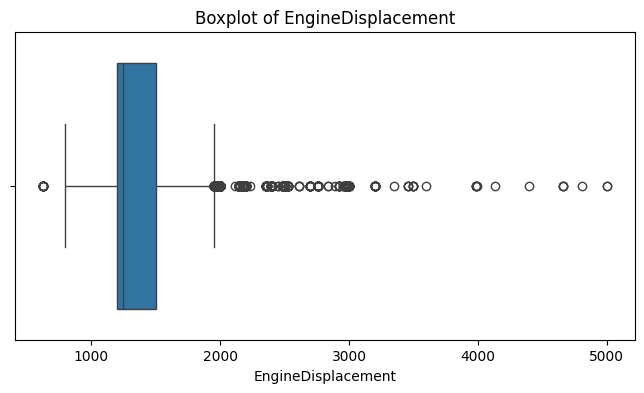

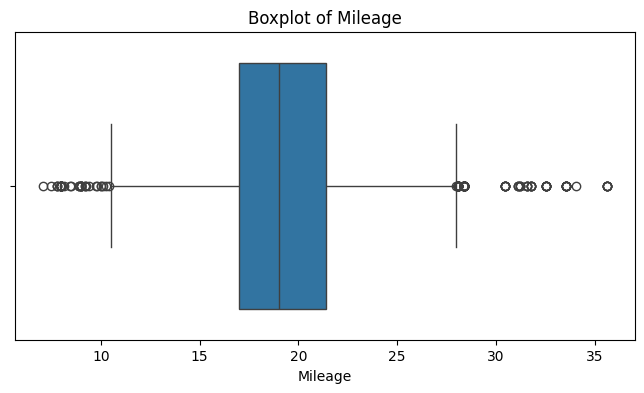

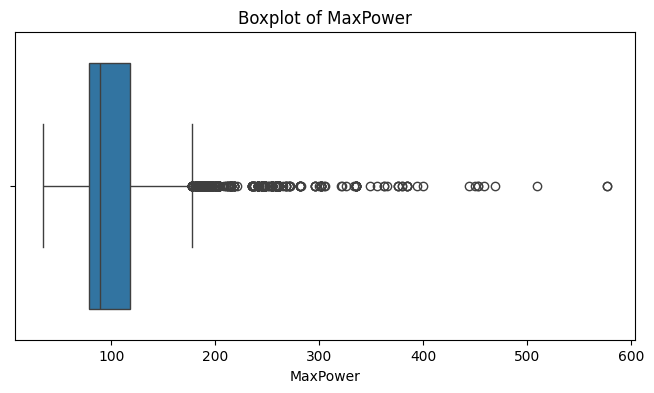

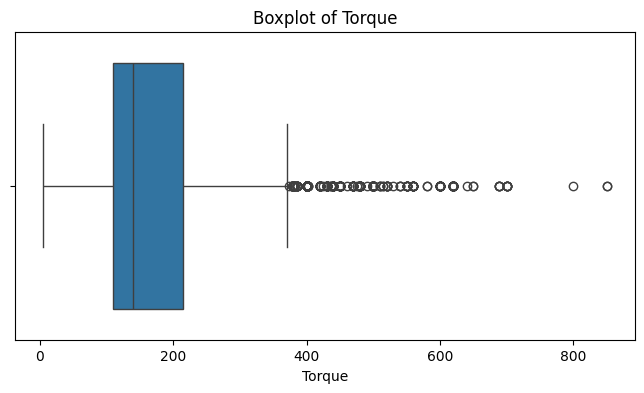

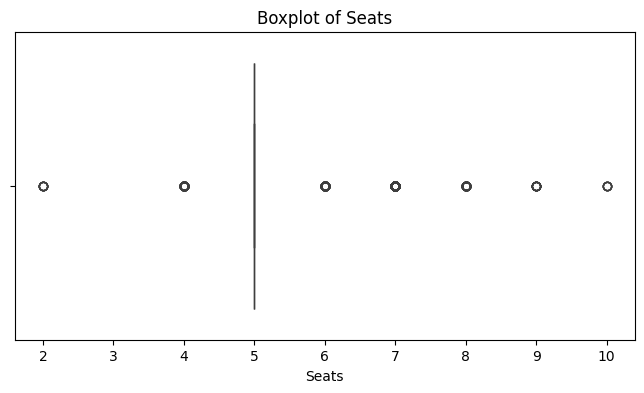

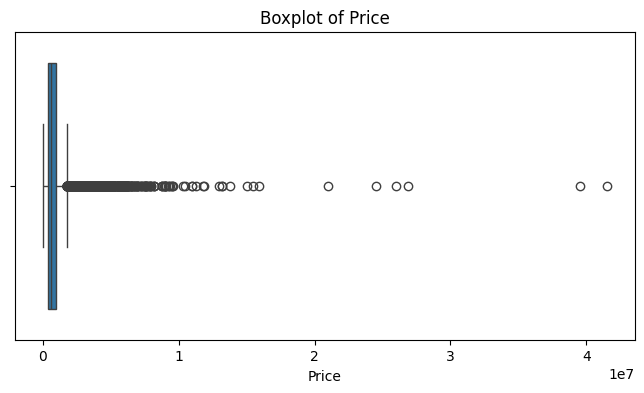

In [94]:
for cols in df_all_numeric:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_all, x=cols)
    plt.title(f'Boxplot of {cols}')
    plt.show()

### Cleaned Data to CSV

In [704]:
df_all.to_csv('car_dheko_cleaned_data.csv')

### Transformation

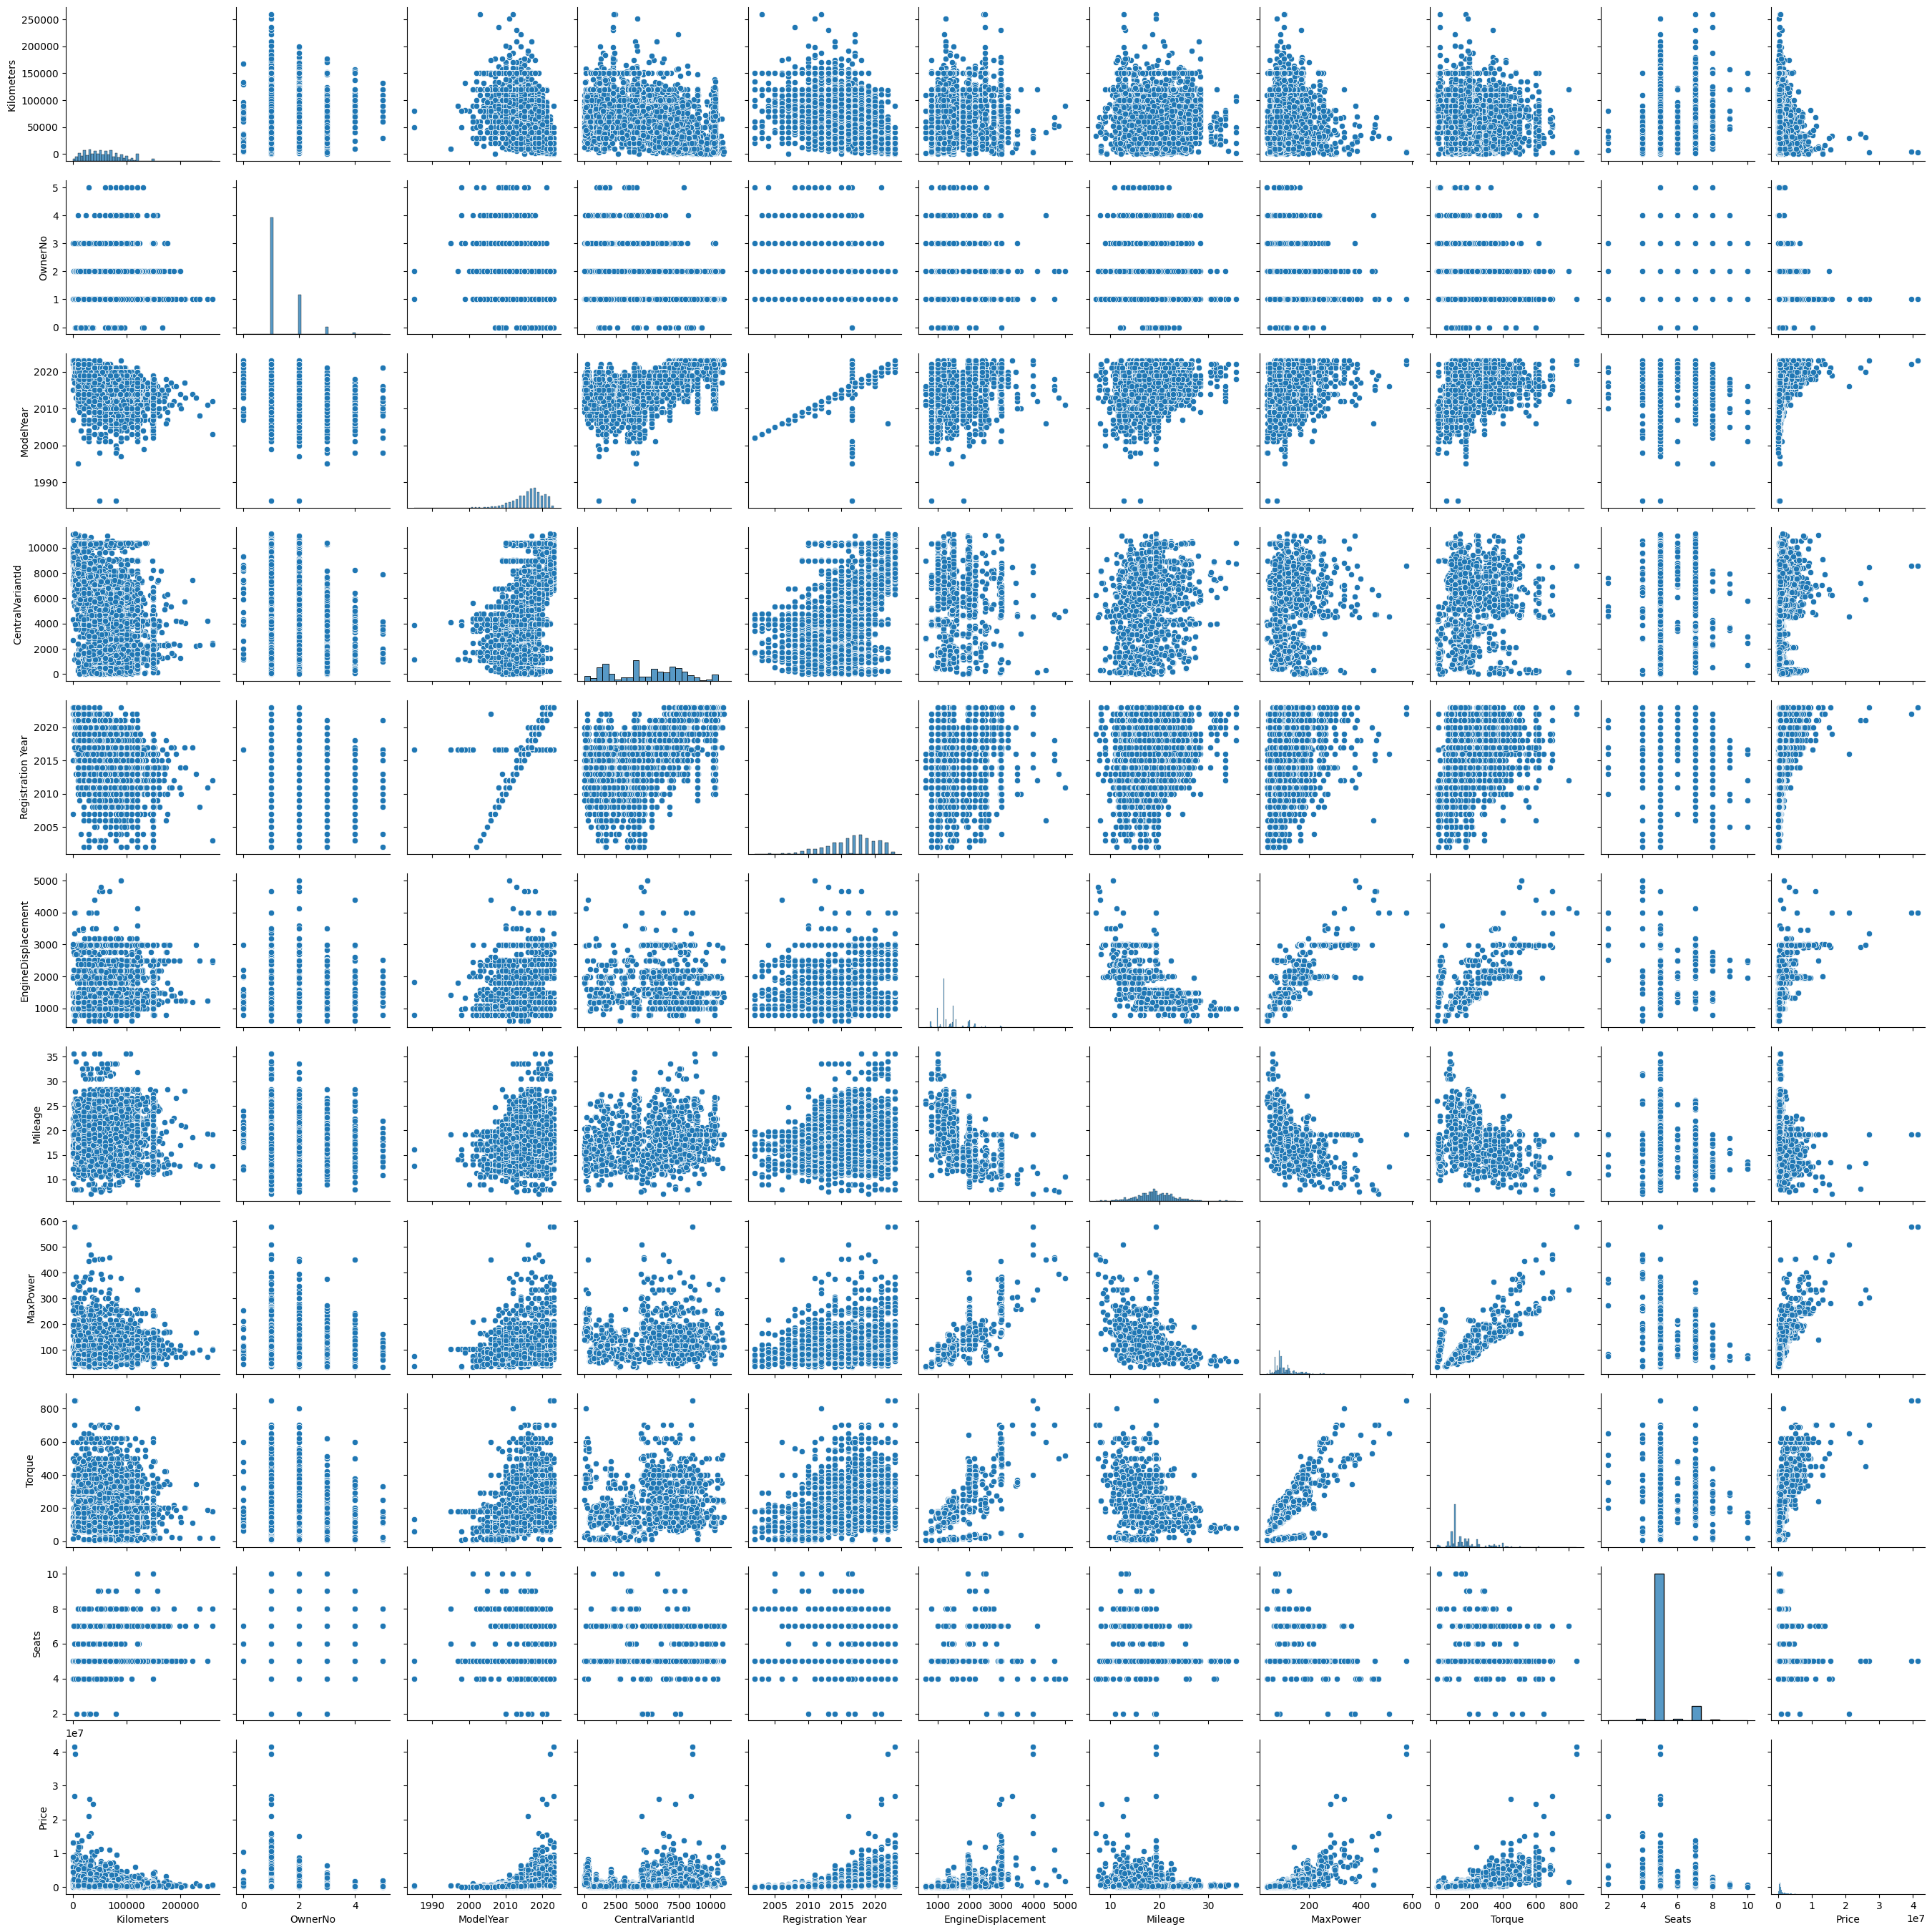

In [95]:
sns.pairplot(df_all)

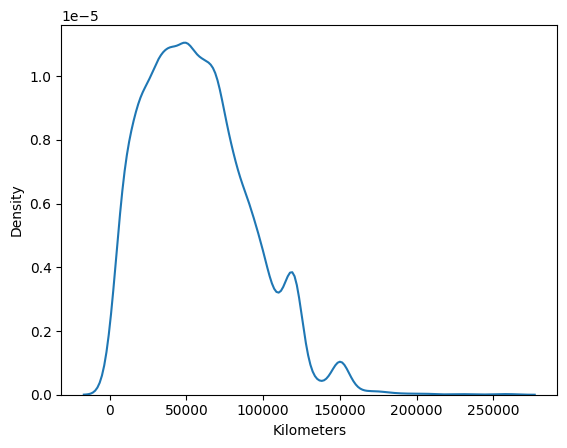

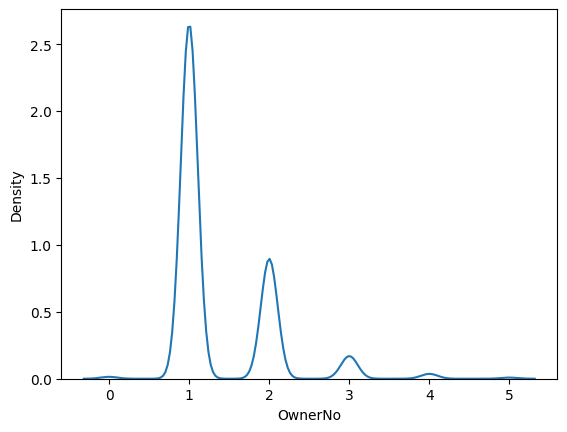

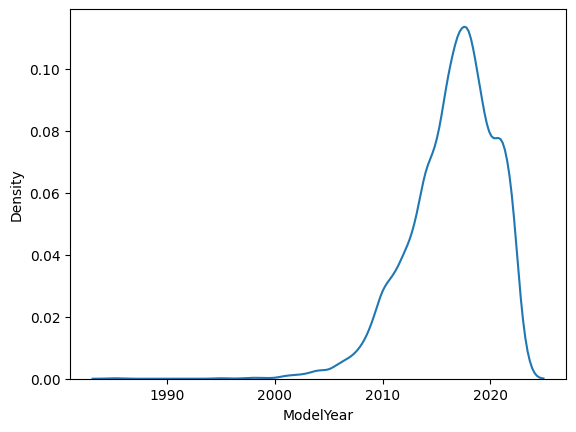

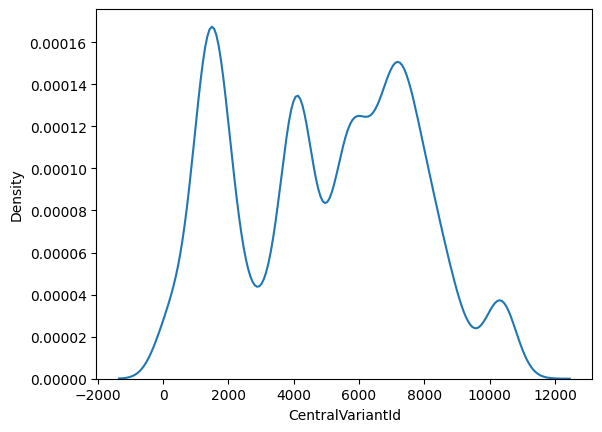

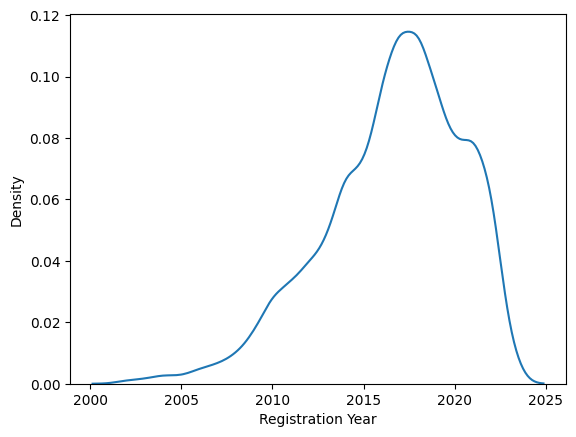

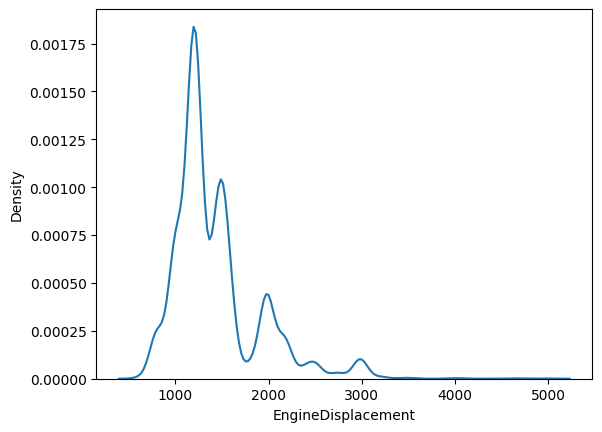

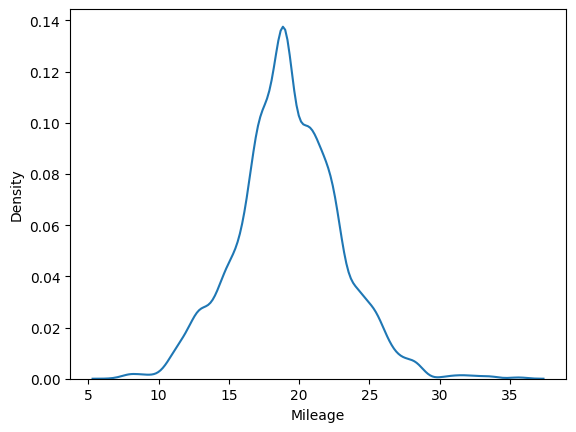

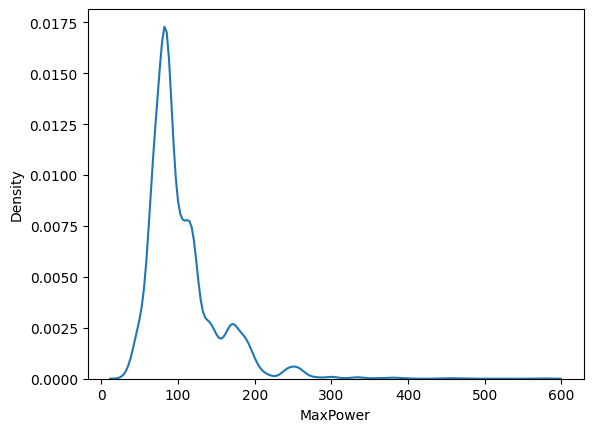

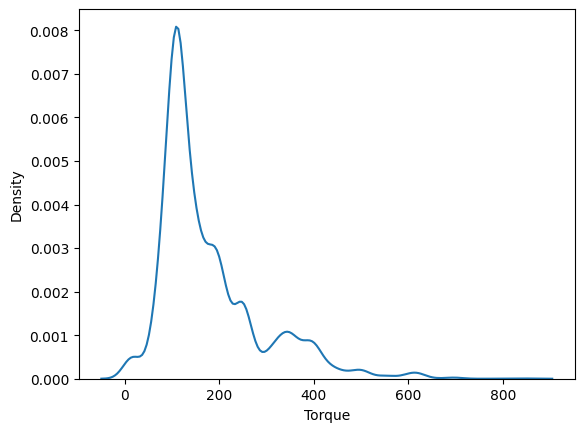

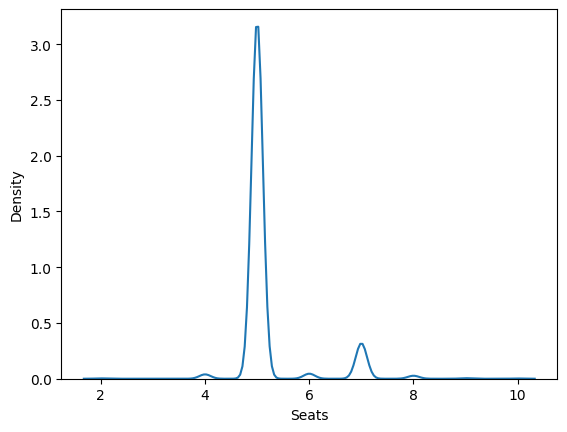

In [96]:
for cols in df_all_numeric.columns[:-1]:
    sns.kdeplot(df_all[cols])
    plt.show()

In [97]:
for cols in df_all_numeric.columns[:-1]:
    print('Skewness of',cols, ':',df_all[cols].skew())

Skewness of Kilometers : 0.7119649555533664
Skewness of OwnerNo : 1.8973530451873013
Skewness of ModelYear : -0.9146286048763105
Skewness of CentralVariantId : 0.010265759405328522
Skewness of Registration Year : -0.7073250722183476
Skewness of EngineDisplacement : 1.7480362988490161
Skewness of Mileage : 0.18598814582324721
Skewness of MaxPower : 2.309453591192624
Skewness of Torque : 1.5923109650133958
Skewness of Seats : 2.593669611241555


In [ ]:
from sklearn.preprocessing import PowerTransformer

# Power Transform
pt = PowerTransformer(method='yeo-johnson')
df_all[['Kilometers', 'EngineDisplacement', 'MaxPower', 'Torque']] = pt.fit_transform(
    df_all[['Kilometers', 'EngineDisplacement', 'MaxPower', 'Torque']]
)


In [99]:
for cols in df_all_numeric.columns[:-1]:
    print('Skewness of',cols, ':',df_all[cols].skew())

Skewness of Kilometers : -0.06948099619927757
Skewness of OwnerNo : 1.8973530451873013
Skewness of ModelYear : -0.9146286048763105
Skewness of CentralVariantId : 0.010265759405328522
Skewness of Registration Year : -0.7073250722183476
Skewness of EngineDisplacement : -0.005042086079066157
Skewness of Mileage : 0.18598814582324721
Skewness of MaxPower : -0.013160985710380973
Skewness of Torque : 0.06269610195098521
Skewness of Seats : 2.593669611241555


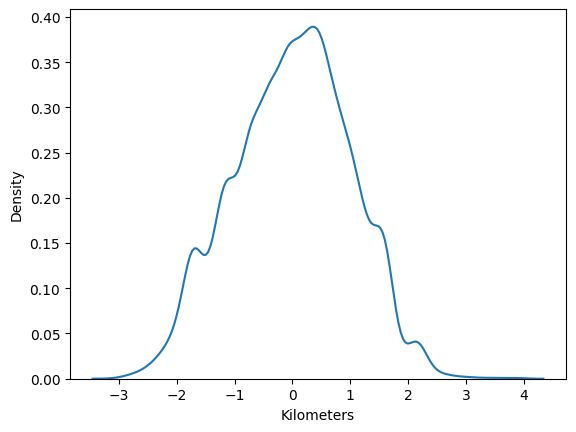

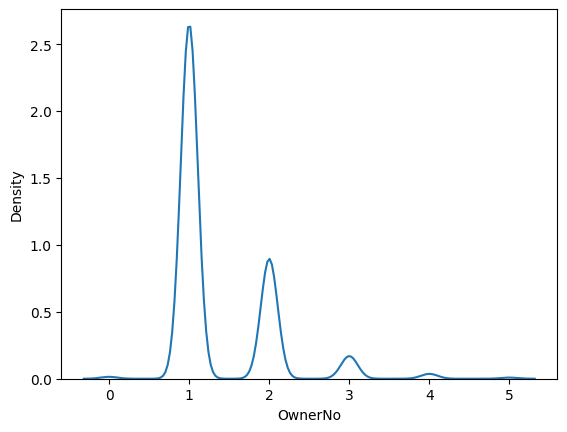

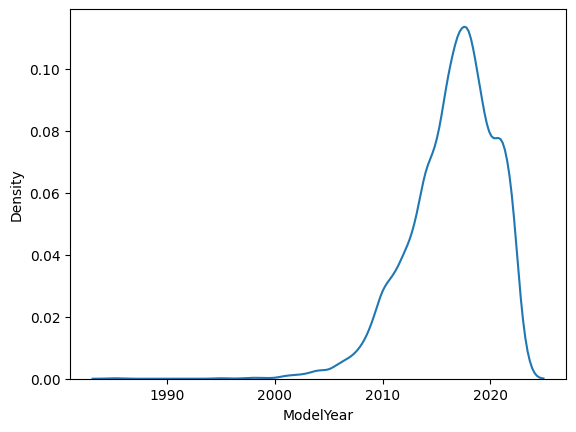

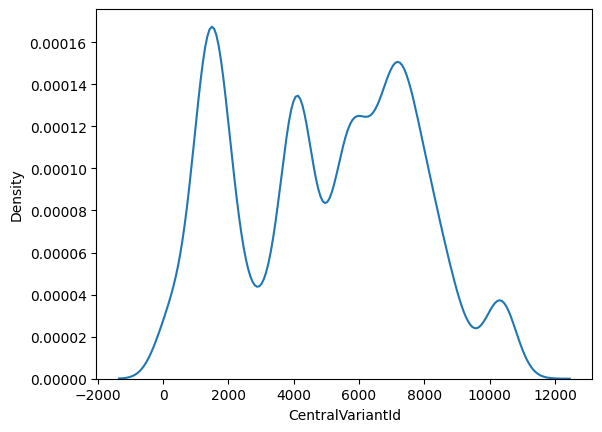

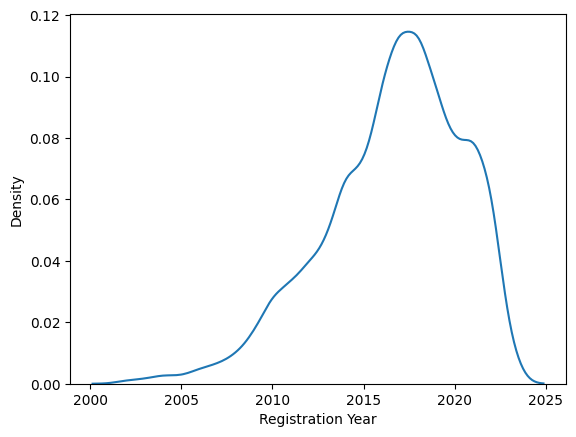

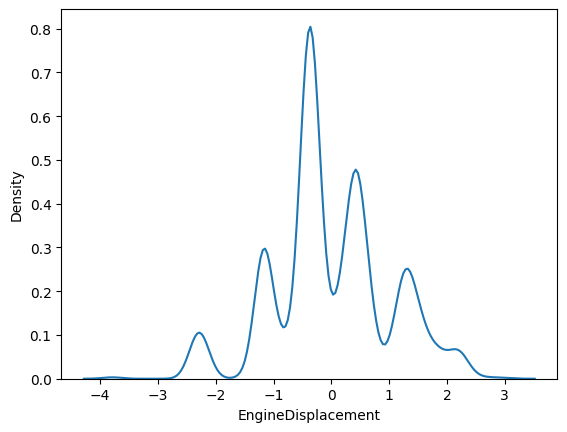

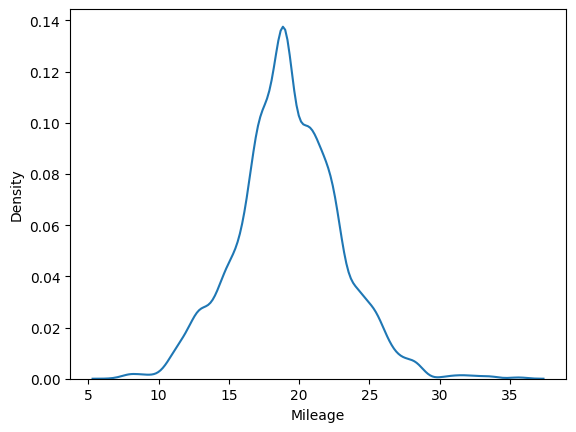

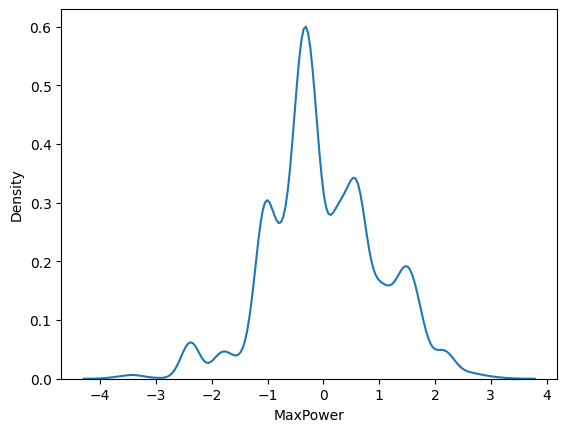

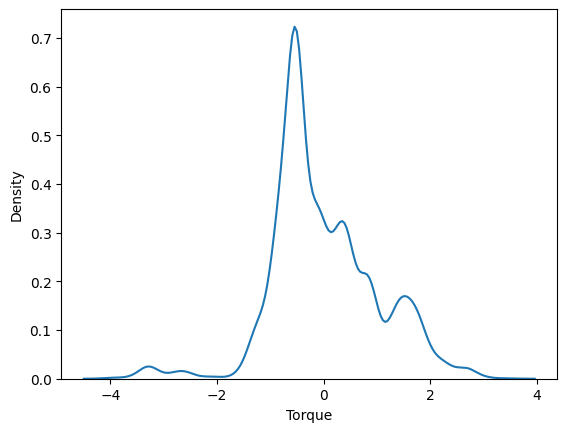

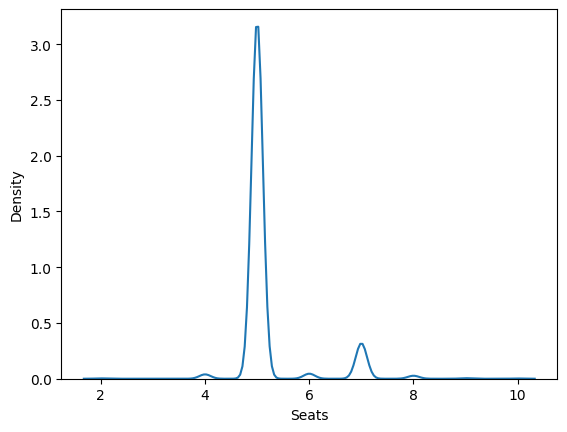

In [100]:
for cols in df_all_numeric.columns[:-1]:
    sns.kdeplot(df_all[cols])
    plt.show()

### Feature Selection using Correlation

In [711]:
df_all.head(2)

FuelType   BodyType  Kilometers Transmission  OwnerNo     Oem  \
0   Petrol  Hatchback    1.590729       Manual        3  Maruti   
1   Petrol        SUV   -0.647207       Manual        2    Ford   

            Model  ModelYear  CentralVariantId               VariantName  ...  \
0  Maruti Celerio       2015              3979                       VXI  ...   
1   Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV  ...   

       InsuranceValidity   RTO EngineDisplacement  Mileage  MaxPower  \
0  Third Party insurance  KA51          -1.165763     23.1 -1.060403   
1          Comprehensive  KA05           0.432594     17.0  0.672019   

     Torque  Seats  WheelSize       City     Price  
0 -0.868602    5.0         16  Bangalore  400000.0  
1 -0.060981    5.0         16  Bangalore  811000.0  

[2 rows x 21 columns]

In [712]:
df_all_corr = df_all.corr(numeric_only=True)

In [713]:
df_all_corr

Kilometers   OwnerNo  ModelYear  CentralVariantId  \
Kilometers            1.000000  0.271363  -0.565095         -0.447766   
OwnerNo               0.271363  1.000000  -0.388232         -0.254110   
ModelYear            -0.565095 -0.388232   1.000000          0.611045   
CentralVariantId     -0.447766 -0.254110   0.611045          1.000000   
Registration Year    -0.571544 -0.383656   0.963981          0.617346   
EngineDisplacement    0.137181  0.030847  -0.010114         -0.115875   
Mileage               0.004275 -0.090207   0.132295          0.130936   
MaxPower             -0.038053 -0.048616   0.169195          0.020432   
Torque                0.018678 -0.078803   0.211922          0.025688   
Seats                 0.108736  0.010766   0.006501          0.009075   
Price                -0.233309 -0.119223   0.297961          0.182033   

                    Registration Year  EngineDisplacement   Mileage  MaxPower  \
Kilometers                  -0.571544            0.137181  0.004275 -0.038053   
OwnerNo                     -0.383656            0.030847 -0.090207 -0.048616   
ModelYear                    0.963981           -0.010114  0.132295  0.169195   
CentralVariantId             0.617346           -0.115875  0.130936  0.020432   
Registration Year            1.000000           -0.018686  0.128149  0.158682   
EngineDisplacement          -0.018686            1.000000 -0.561437  0.869006   
Mileage                      0.128149           -0.561437  1.000000 -0.574951   
MaxPower                     0.158682            0.869006 -0.574951  1.000000   
Torque                       0.203853            0.718890 -0.299956  0.769720   
Seats                        0.004821            0.367401 -0.314994  0.213186   
Price                        0.298641            0.465953 -0.286107  0.565472   

                      Torque     Seats     Price  
Kilometers          0.018678  0.108736 -0.233309  
OwnerNo            -0.078803  0.010766 -0.119223  
ModelYear           0.211922  0.006501  0.297961  
CentralVariantId    0.025688  0.009075  0.182033  
Registration Year   0.203853  0.004821  0.298641  
EngineDisplacement  0.718890  0.367401  0.465953  
Mileage            -0.299956 -0.314994 -0.286107  
MaxPower            0.769720  0.213186  0.565472  
Torque              1.000000  0.249550  0.542736  
Seats               0.249550  1.000000  0.084558  
Price               0.542736  0.084558  1.000000

<Axes: >

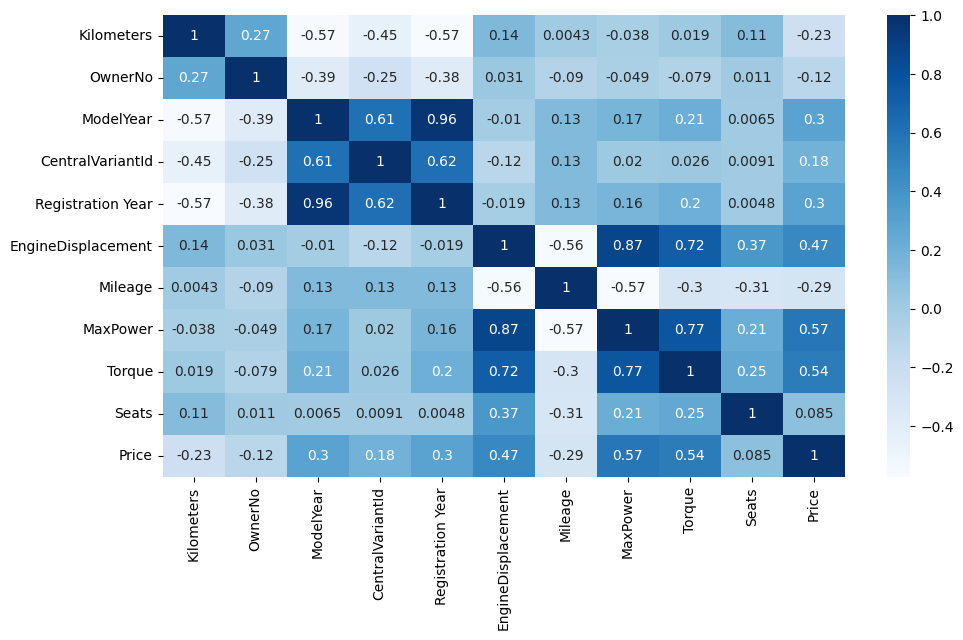

In [714]:
plt.figure(figsize=(11,6))
sns.heatmap(data=df_all_corr,annot=True,cmap='Blues')

The correlation value above 0.8 is high correlation.

From the above heatmap we can come to a conclusion that below are the features with high correlation:

ModelYear and Registration Year: Correlation = 0.96

Max Power and Engine Displacement: Correlation = 0.87

Hence, we can drop the features: Registration Year and Max Power

In [715]:
df_all = df_all.drop(columns=['Registration Year','MaxPower'])

In [716]:
df_all_numeric = df_all_numeric.drop(columns=['Registration Year','MaxPower'])

In [717]:
df_all.head(2)

FuelType   BodyType  Kilometers Transmission  OwnerNo     Oem  \
0   Petrol  Hatchback    1.590729       Manual        3  Maruti   
1   Petrol        SUV   -0.647207       Manual        2    Ford   

            Model  ModelYear  CentralVariantId               VariantName  \
0  Maruti Celerio       2015              3979                       VXI   
1   Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV   

       InsuranceValidity   RTO  EngineDisplacement  Mileage    Torque  Seats  \
0  Third Party insurance  KA51           -1.165763     23.1 -0.868602    5.0   
1          Comprehensive  KA05            0.432594     17.0 -0.060981    5.0   

  WheelSize       City     Price  
0        16  Bangalore  400000.0  
1        16  Bangalore  811000.0

In [718]:
df_all.describe().T

count          mean           std           min  \
Kilometers          8330.0  2.303080e-16  1.000060e+00     -2.958825   
OwnerNo             8330.0  1.361104e+00  6.424565e-01      0.000000   
ModelYear           8330.0  2.016490e+03  3.915724e+00   1985.000000   
CentralVariantId    8330.0  4.953255e+03  2.746113e+03      5.000000   
EngineDisplacement  8330.0 -1.046980e-13  1.000060e+00     -3.788501   
Mileage             8330.0  1.923280e+01  3.605932e+00      7.080000   
Torque              8330.0 -3.983475e-16  1.000060e+00     -4.002635   
Seats               8330.0  5.203721e+00  6.631914e-01      2.000000   
Price               8330.0  9.541931e+05  1.415970e+06  20161.000000   

                              25%            50%            75%           max  
Kilometers              -0.748373       0.038601       0.725148  3.843016e+00  
OwnerNo                  1.000000       1.000000       2.000000  5.000000e+00  
ModelYear             2014.000000    2017.000000    2019.000000  2.023000e+03  
CentralVariantId      2021.250000    5292.000000    7116.750000  1.109800e+04  
EngineDisplacement      -0.385224      -0.221438       0.434825  3.026081e+00  
Mileage                 17.010000      19.010000      21.400000  3.560000e+01  
Torque                  -0.562232      -0.175478       0.565521  3.466288e+00  
Seats                    5.000000       5.000000       5.000000  1.000000e+01  
Price               399000.000000  600000.000000  950000.000000  4.150000e+07

### Adding Synthetic data

In [ ]:
# Extract data for CNG and LPG fuel types
cng_data = df_all[df_all['FuelType'] == 'Cng']
lpg_data = df_all[df_all['FuelType'] == 'Lpg']

print("Original Dataset Shape:", df_all.shape)

# Oversample data for both fuel types
oversampled_cng = cng_data.sample(n=400, replace=True, random_state=42)
oversampled_lpg = lpg_data.sample(n=400, replace=True, random_state=42)

# Combine the original data with the oversampled data
df_all = pd.concat([df_all, oversampled_cng, oversampled_lpg]).reset_index(drop=True)

# Check the shape of the new balanced dataset
print("Balanced Dataset Shape:", df_all.shape)


Original Dataset Shape: (8330, 19)
Balanced Dataset Shape: (9130, 19)


In [720]:
df_all['FuelType'].value_counts()

FuelType
Petrol    5549
Diesel    2667
Cng        498
Lpg        416
Name: count, dtype: int64

### Data PreProcessing - Encoding and Scaling

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

def preprocess_data(df):

    # Dropping unnecessary columns
    df.drop(columns=['RTO', 'WheelSize', 'VariantName', 'CentralVariantId'], inplace=True)

    numerical_cols = df.select_dtypes(include=np.number).columns.drop(['OwnerNo','ModelYear','Seats'])
    scaler = StandardScaler()
    df[numerical_cols[:-1]] = scaler.fit_transform(df[numerical_cols[:-1]])
    
    # One-hot encoding selected columns
    onehot_columns = ['FuelType', 'Transmission', 'BodyType', 'InsuranceValidity']
    ohe = OneHotEncoder(sparse_output=False, drop='first')
    df_ohe = ohe.fit_transform(df[onehot_columns])
    df_ohe = pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out(input_features=onehot_columns))
    
    # Label encoding other categorical columns

    label_encoder_oem = LabelEncoder()
    df['Oem'] = label_encoder_oem.fit_transform(df['Oem'])

    label_encoder_city = LabelEncoder()
    df['City'] = label_encoder_city.fit_transform(df['City'])

    label_encoder_model = LabelEncoder()
    df['Model'] = label_encoder_model.fit_transform(df['Model'])
    
    # Dropping original one-hot encoded columns and resetting indices for concatenation
    df_copy = df.drop(columns=onehot_columns).reset_index(drop=True)
    df_ohe = df_ohe.reset_index(drop=True)
    
    # Concatenating one-hot encoded columns with the rest of the data
    df_all_encoded = pd.concat([df_ohe, df_copy], axis=1)

    joblib.dump(ohe,'OneHotEncoder.joblib')
    joblib.dump(label_encoder_oem,'LabelEncoder_Oem.joblib')
    joblib.dump(label_encoder_city,'LabelEncoder_City.joblib')
    joblib.dump(label_encoder_model,'LabelEncoder_Model.joblib')
    joblib.dump(scaler,'StandardScaler.joblib')

    return df_all_encoded

In [ ]:
df_all_encoded = df_all.copy()
df_encoded_scaled = preprocess_data(df_all_encoded)

In [725]:
df_all_encoded.columns

Index(['FuelType', 'BodyType', 'Kilometers', 'Transmission', 'OwnerNo', 'Oem',
       'Model', 'ModelYear', 'InsuranceValidity', 'EngineDisplacement',
       'Mileage', 'Torque', 'Seats', 'City', 'Price'],
      dtype='object')

In [726]:
df_encoded_scaled

FuelType_Diesel  FuelType_Lpg  FuelType_Petrol  Transmission_Manual  \
0                 0.0           0.0              1.0                  1.0   
1                 0.0           0.0              1.0                  1.0   
2                 0.0           0.0              1.0                  1.0   
3                 0.0           0.0              1.0                  1.0   
4                 1.0           0.0              0.0                  1.0   
...               ...           ...              ...                  ...   
9125              0.0           1.0              0.0                  1.0   
9126              0.0           1.0              0.0                  1.0   
9127              0.0           1.0              0.0                  1.0   
9128              0.0           1.0              0.0                  1.0   
9129              0.0           1.0              0.0                  1.0   

      BodyType_Coupe  BodyType_Hatchback  BodyType_Hybrids  BodyType_MUV  \
0                0.0                 1.0               0.0           0.0   
1                0.0                 0.0               0.0           0.0   
2                0.0                 1.0               0.0           0.0   
3                0.0                 0.0               0.0           0.0   
4                0.0                 0.0               0.0           0.0   
...              ...                 ...               ...           ...   
9125             0.0                 1.0               0.0           0.0   
9126             0.0                 1.0               0.0           0.0   
9127             0.0                 1.0               0.0           0.0   
9128             0.0                 1.0               0.0           0.0   
9129             0.0                 1.0               0.0           0.0   

      BodyType_Minivans  BodyType_Pickup Trucks  ...  OwnerNo  Oem  Model  \
0                   0.0                     0.0  ...        3   20    155   
1                   0.0                     0.0  ...        2    6     50   
2                   0.0                     0.0  ...        1   29    262   
3                   0.0                     0.0  ...        1    9     86   
4                   0.0                     0.0  ...        1   20    172   
...                 ...                     ...  ...      ...  ...    ...   
9125                0.0                     0.0  ...        1    9     81   
9126                0.0                     0.0  ...        2    9     74   
9127                0.0                     0.0  ...        1   20    178   
9128                0.0                     0.0  ...        2    9     74   
9129                0.0                     0.0  ...        2    9     81   

      ModelYear  EngineDisplacement   Mileage    Torque  Seats  City     Price  
0          2015           -1.085667  0.888571 -0.726293    5.0     0  400000.0  
1          2018            0.502182 -0.607440  0.040074    5.0     0  811000.0  
2          2018           -0.303645  1.070054 -0.382449    5.0     0  585000.0  
3          2014           -0.310259 -0.092420 -0.385727    5.0     0  462000.0  
4          2015           -0.147551  1.023457  0.511342    5.0     0  790000.0  
...         ...                 ...       ...       ...    ...   ...       ...  
9125       2010           -0.711361 -1.478069 -0.632715    5.0     3  220000.0  
9126       2016           -2.098581  0.398076 -0.988418    5.0     3  180000.0  
9127       2009           -0.812030 -0.533865 -3.355081    5.0     3  225000.0  
9128       2016           -2.098581  0.398076 -0.988418    5.0     3  180000.0  
9129       2009           -0.711361 -1.478069 -0.632715    5.0     0  220000.0  

[9130 rows x 29 columns]

### Data For Model Building

In [727]:
df_encoded_scaled.head(2)

FuelType_Diesel  FuelType_Lpg  FuelType_Petrol  Transmission_Manual  \
0              0.0           0.0              1.0                  1.0   
1              0.0           0.0              1.0                  1.0   

   BodyType_Coupe  BodyType_Hatchback  BodyType_Hybrids  BodyType_MUV  \
0             0.0                 1.0               0.0           0.0   
1             0.0                 0.0               0.0           0.0   

   BodyType_Minivans  BodyType_Pickup Trucks  ...  OwnerNo  Oem  Model  \
0                0.0                     0.0  ...        3   20    155   
1                0.0                     0.0  ...        2    6     50   

   ModelYear  EngineDisplacement   Mileage    Torque  Seats  City     Price  
0       2015           -1.085667  0.888571 -0.726293    5.0     0  400000.0  
1       2018            0.502182 -0.607440  0.040074    5.0     0  811000.0  

[2 rows x 29 columns]

In [728]:
df_encoded_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9130 entries, 0 to 9129
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FuelType_Diesel                          9130 non-null   float64
 1   FuelType_Lpg                             9130 non-null   float64
 2   FuelType_Petrol                          9130 non-null   float64
 3   Transmission_Manual                      9130 non-null   float64
 4   BodyType_Coupe                           9130 non-null   float64
 5   BodyType_Hatchback                       9130 non-null   float64
 6   BodyType_Hybrids                         9130 non-null   float64
 7   BodyType_MUV                             9130 non-null   float64
 8   BodyType_Minivans                        9130 non-null   float64
 9   BodyType_Pickup Trucks                   9130 non-null   float64
 10  BodyType_SUV                             9130 no

In [729]:
df_encoded_scaled.to_csv('Data_for_Model_Building.csv',index=False)

### EDA

#### Descriptive Statistics

In [125]:
df_all_numeric.describe().T

count           mean           std       min       25%  \
Kilometers          8363.0   58961.609112  7.408110e+04      0.00   30000.0   
ModelYear           8363.0    2016.506876  3.919215e+00   1985.00    2014.0   
CentralVariantId    8363.0    4963.024274  2.747542e+03      5.00    2041.5   
EngineDisplacement  8359.0    1424.606652  4.774169e+02      0.00    1197.0   
Mileage             8077.0      19.257534  4.030301e+00      7.08      17.0   
Torque              8307.0     177.837338  1.098687e+02      4.80     110.0   
Price               8363.0  957392.899318  1.416581e+06  20161.00  399500.0   

                         50%       75%         max  
Kilometers           53657.0   80000.0   5500000.0  
ModelYear             2017.0    2019.0      2023.0  
CentralVariantId      5320.0    7121.0     11098.0  
EngineDisplacement    1248.0    1498.0      5000.0  
Mileage                 18.9      21.5       140.0  
Torque                 140.0     216.5       850.0  
Price               601000.0  950000.0  41500000.0

In [126]:
for col in df_all_categorical.columns:
    print(df_all[col].value_counts())

FuelType
Petrol    5549
Diesel    2667
Cng         98
Lpg         16
Name: count, dtype: int64
BodyType
Hatchback        3564
SUV              2202
Sedan            2167
MUV               350
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64
Transmission
Manual       6042
Automatic    2288
Name: count, dtype: int64
OwnerNo
1    5850
2    1977
3     373
4      80
0      31
5      19
Name: count, dtype: int64
Oem
Maruti                2249
Hyundai               1650
Honda                  865
Tata                   415
Mahindra               372
Toyota                 323
Renault                312
Ford                   310
Volkswagen             294
Mercedes-Benz          243
BMW                    184
Skoda                  161
Kia                    157
Audi                   156
Jeep                   112
MG                      85
Nissan                  77
Chevrolet         

#### Data Visualization

In [127]:
df_all.head(2)

FuelType   BodyType  Kilometers Transmission OwnerNo     Oem  \
0   Petrol  Hatchback    1.590729       Manual       3  Maruti   
1   Petrol        SUV   -0.647207       Manual       2    Ford   

            Model  ModelYear  CentralVariantId               VariantName  \
0  Maruti Celerio       2015              3979                       VXI   
1   Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV   

       InsuranceValidity   RTO  EngineDisplacement  Mileage    Torque Seats  \
0  Third Party insurance  KA51           -1.165761     23.1 -0.868614   5.0   
1          Comprehensive  KA05            0.432600     17.0 -0.060999   5.0   

  WheelSize       City     Price  
0        16  Bangalore  400000.0  
1        16  Bangalore  811000.0

In [128]:
df_all_categorical.head(2)

FuelType   BodyType Transmission OwnerNo     Oem           Model  \
0   Petrol  Hatchback       Manual       3  Maruti  Maruti Celerio   
1   Petrol        SUV       Manual       2    Ford   Ford Ecosport   

                VariantName      InsuranceValidity   RTO Seats WheelSize  \
0                       VXI  Third Party insurance  KA51   5.0       NaN   
1  1.5 Petrol Titanium BSIV          Comprehensive  KA05   5.0        16   

        City  
0  Bangalore  
1  Bangalore

In [129]:
fig = px.histogram(df_all, x='FuelType')
fig.update_layout(title='Cars Purchased based on Fuel Type')
fig.show()

From the plot we can tell that the top two Fuel types opted by the customers are Petrol with 5554 Cars purchased and Diesel with 2673 cars purchased.

In [130]:
fig = px.histogram(df_all, x='BodyType',color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title='Cars Counts based on Body Type')
fig.show()

From the above plot we can know that the Hatchback is the most popular body type opted by customers, followed by SUV and Sedan

In [131]:
fig = px.histogram(df_all, x='Transmission',color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_layout(title='Cars Purchased based on Transmission')
fig.show()

From the above plot we can tell that Manual transmission is preffered more by the customers with a total of 6052 cars purchased whereas Automatic transmission with 2317 purchases.

In [132]:
fig = px.histogram(df_all, x='Model',color_discrete_sequence=px.colors.qualitative.Set1_r)
fig.update_layout(title='Cars Purchased based on Model')
fig.show()

The above plot shows us the top five popular/sold model types  are: Honda City (370 Cars), Maruti Swift(350 Cars), Hyundai i20(331 Cars), Maruti Baleno(295 Cars) and Hyundai Grand i10(260 cars)

In [133]:
fig = px.histogram(df_all, x='InsuranceValidity',color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(title='Cars Purchased based on Model')
fig.show()

In [134]:
fig = px.histogram(df_all, x='City',color_discrete_sequence=px.colors.qualitative.Set3_r)
fig.update_layout(title='Cars Purchased based on Model')
fig.show()

From the above plot we can know that Delhi has the most cars sold followed by Hyderabad, Bangalore and Chennai

In [135]:
df_all_numeric.columns

Index(['Kilometers', 'ModelYear', 'CentralVariantId', 'EngineDisplacement',
       'Mileage', 'Torque', 'Price'],
      dtype='object')

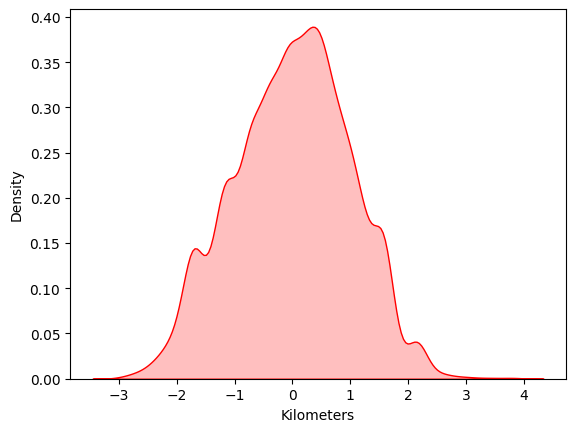

In [136]:
sns.kdeplot(df_all['Kilometers'],fill=True,color='r')
plt.show()

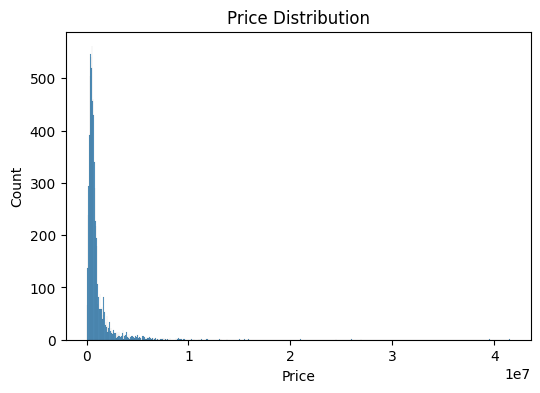

In [137]:
plt.figure(figsize=(6,4))
sns.histplot(df_all['Price'])
plt.title('Price Distribution')
plt.show()

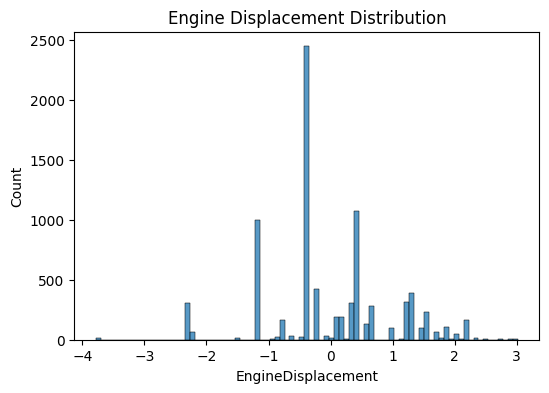

In [138]:
plt.figure(figsize=(6,4))
sns.histplot(df_all['EngineDisplacement'])
plt.title('Engine Displacement Distribution')
plt.show()

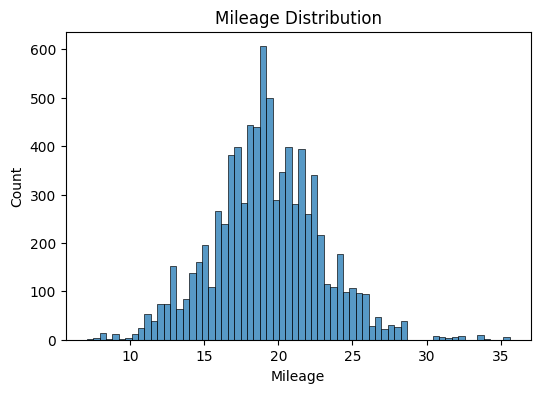

In [139]:
plt.figure(figsize=(6,4))
sns.histplot(df_all['Mileage'])
plt.title('Mileage Distribution')
plt.show()

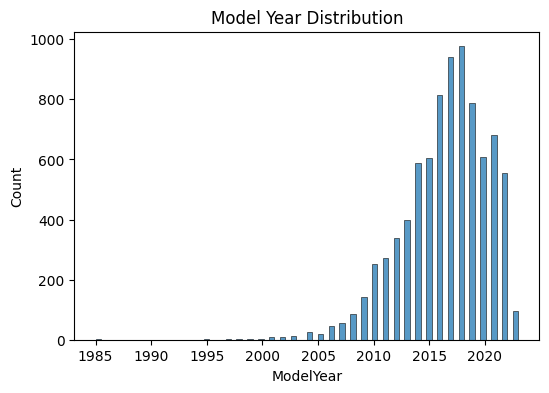

In [140]:
plt.figure(figsize=(6,4))
sns.histplot(df_all['ModelYear'])
plt.title('Model Year Distribution')
plt.show()

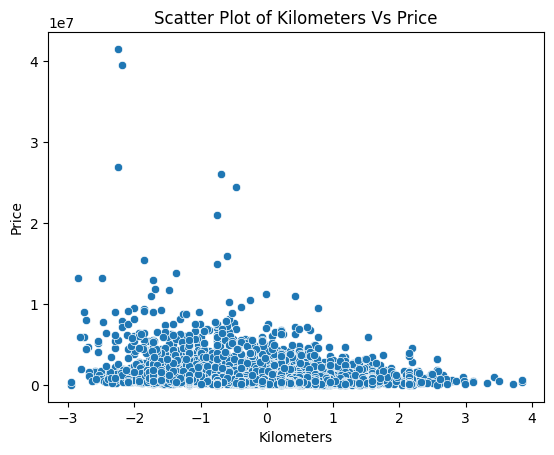

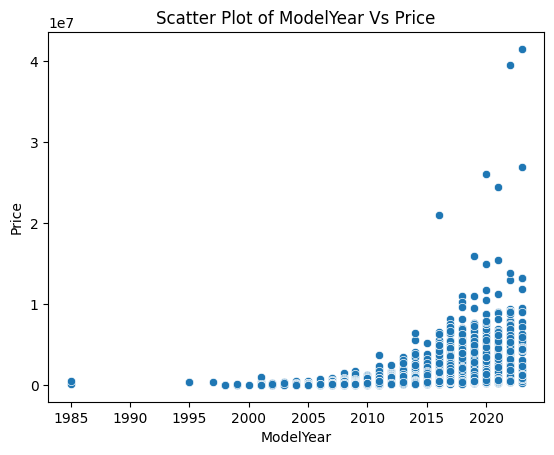

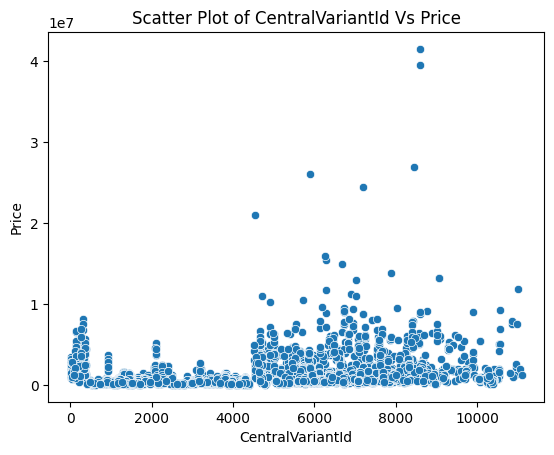

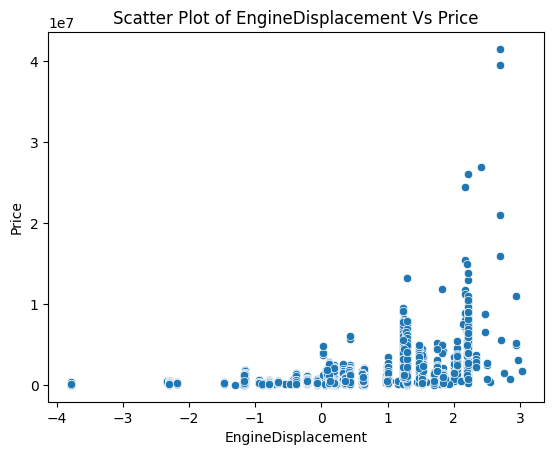

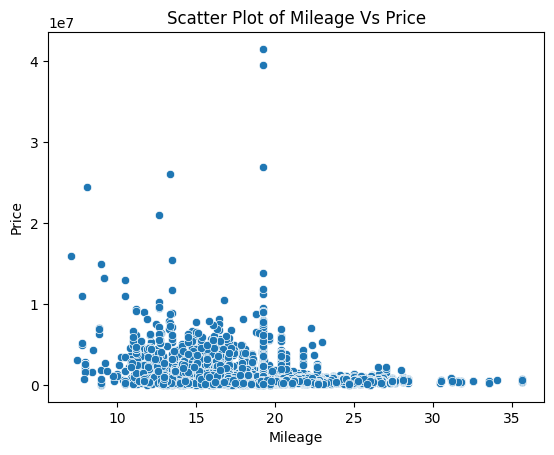

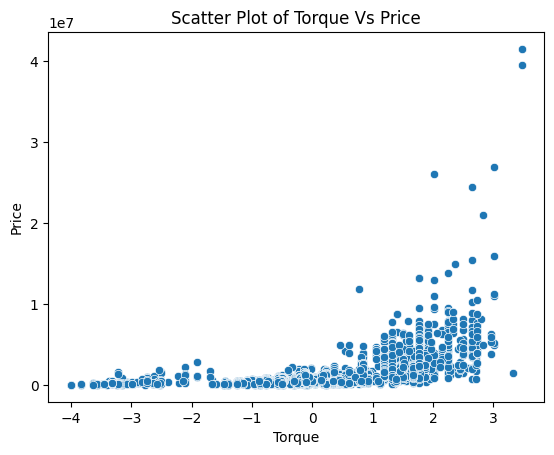

In [141]:
for col in df_all_numeric.columns[:-1]:
    sns.scatterplot(x=df_all[col], y=df_all['Price'])
    plt.title(f'Scatter Plot of {col} Vs Price')
    plt.show()

<Axes: >

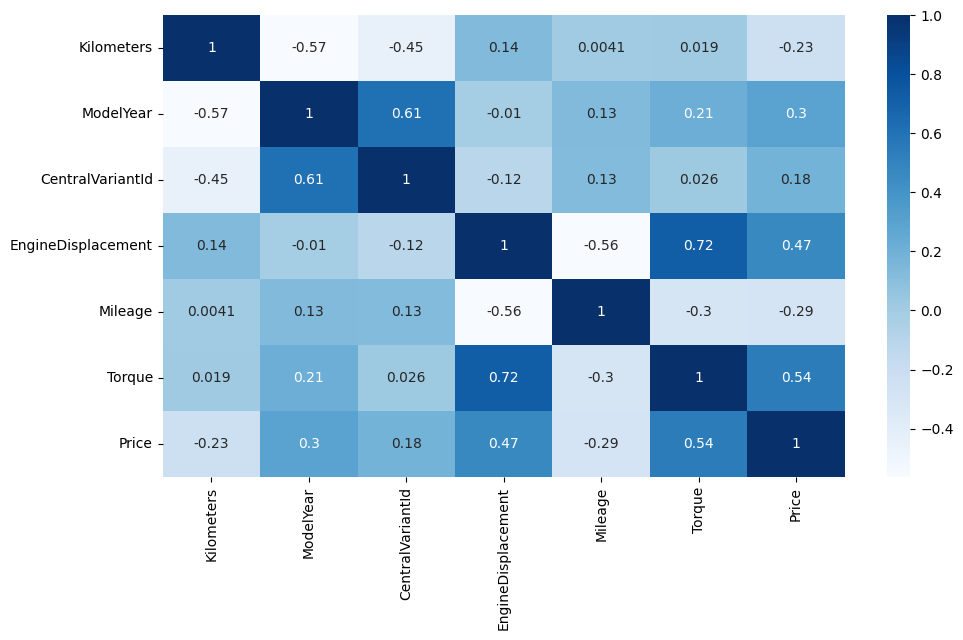

In [142]:
plt.figure(figsize=(11,6))
corr = df_all.corr(numeric_only=True)
sns.heatmap(corr,cmap='Blues',annot=True)

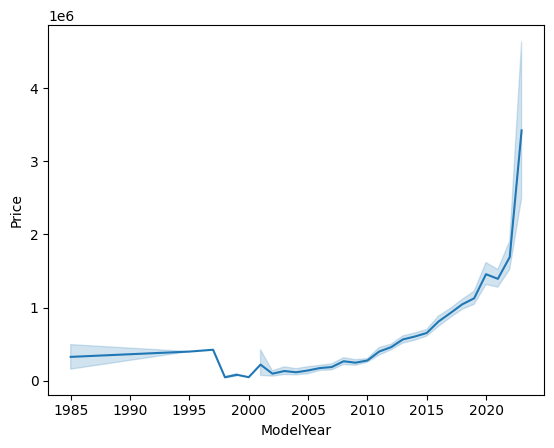

In [143]:
sns.lineplot(x=df_all['ModelYear'],y=df_all['Price'])
plt.show()

In [144]:
city_price_stats = df_all.groupby('City')['Price'].agg(['mean', 'median', 'std', 'count']).reset_index()
city_price_stats = city_price_stats.sort_values(by='mean', ascending=False)
print(city_price_stats)


        City          mean    median           std  count
2      Delhi  1.378965e+06  650500.0  2.438712e+06   1482
1    Chennai  1.010090e+06  640000.0  1.249628e+06   1414
0  Bangalore  9.543060e+05  671000.0  9.716960e+05   1474
3  Hyderabad  8.257178e+05  605000.0  1.009468e+06   1477
5    Kolkata  7.892908e+05  500000.0  1.046680e+06   1371
4     Jaipur  6.908147e+05  500000.0  8.892601e+05   1112


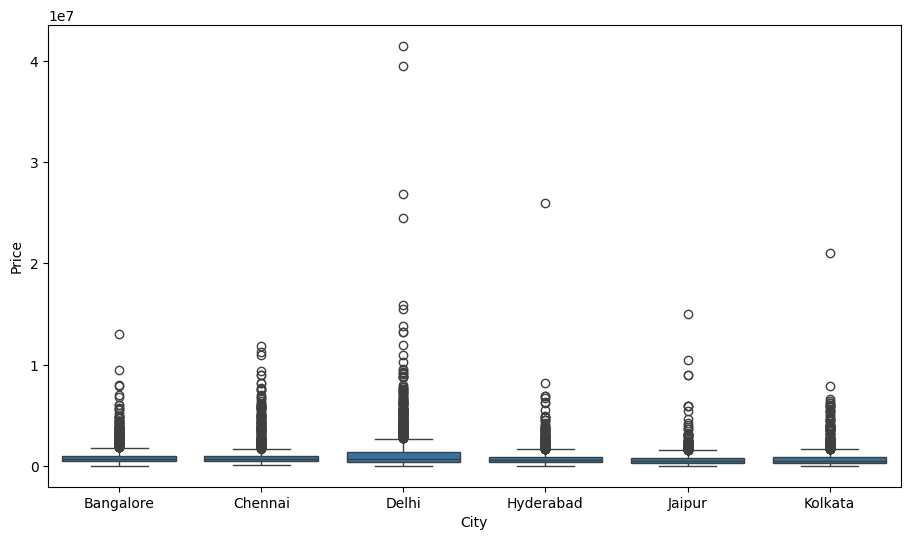

In [145]:
plt.figure(figsize=(11,6))
sns.boxplot(x=df_all['City'],y=df_all['Price'])
plt.show()

### Model Building

#### Data for Modelling

In [101]:
data = pd.read_csv('Data_for_Model_Building.csv')
data.head(2)

FuelType_Diesel  FuelType_Lpg  FuelType_Petrol  Transmission_Manual  \
0              0.0           0.0              1.0                  1.0   
1              0.0           0.0              1.0                  1.0   

   BodyType_Coupe  BodyType_Hatchback  BodyType_Hybrids  BodyType_MUV  \
0             0.0                 1.0               0.0           0.0   
1             0.0                 0.0               0.0           0.0   

   BodyType_Minivans  BodyType_Pickup Trucks  ...  OwnerNo  Oem  Model  \
0                0.0                     0.0  ...        3   20    155   
1                0.0                     0.0  ...        2    6     50   

   ModelYear  EngineDisplacement   Mileage    Torque  Seats  City     Price  
0       2015           -1.085667  0.888571 -0.726293    5.0     0  400000.0  
1       2018            0.502182 -0.607440  0.040074    5.0     0  811000.0  

[2 rows x 29 columns]

In [102]:
X = data.drop('Price',axis=1)
y = data['Price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Predictive Modelling

In [104]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error,root_mean_squared_error

In [105]:
def model_validation(xtrain,ytrain,xtest,ytest,model):
    global m
    m = model
    m.fit(xtrain,ytrain)
    
    print('Training Scores')
    pred = m.predict(xtrain)
    print('R2:',r2_score(ytrain,pred))
    print('MAE:',mean_absolute_error(ytrain,pred))
    print('MSE:',mean_squared_error(ytrain,pred))
    print('RMSE:',mean_squared_error(ytrain,pred)**0.5)
    print('MAPE:',mean_absolute_percentage_error(ytrain,pred))
    
    print('\nTest Scores')
    pred = m.predict(xtest)
    print('R2:',r2_score(ytest,pred))
    print('MAE:',mean_absolute_error(ytest,pred))
    print('MSE:',mean_squared_error(ytest,pred))
    print('RMSE:',mean_squared_error(ytest,pred)**0.5)
    print('MAPE:',mean_absolute_percentage_error(ytest,pred))
    

In [106]:
def model_validation_new(xtrain, ytrain, xtest, ytest, model_list):
    best_model = None
    best_metrics = None
    best_score = -float('inf')  
    model_results = {}  
    
    for model in model_list:
        model.fit(xtrain, ytrain)
        
        train_pred = model.predict(xtrain)
        train_r2 = r2_score(ytrain, train_pred)
        train_mae = mean_absolute_error(ytrain, train_pred)
        train_mse = mean_squared_error(ytrain, train_pred)
        train_rmse = train_mse ** 0.5
        train_mape = mean_absolute_percentage_error(ytrain, train_pred)

        test_pred = model.predict(xtest)
        test_r2 = r2_score(ytest, test_pred)
        test_mae = mean_absolute_error(ytest, test_pred)
        test_mse = mean_squared_error(ytest, test_pred)
        test_rmse = test_mse ** 0.5
        test_mape = mean_absolute_percentage_error(ytest, test_pred)
        
        # Store metrics for this model
        metrics = {
            'train_scores': {
                'R2': train_r2,
                'MAE': train_mae,
                'MSE': train_mse,
                'RMSE': train_rmse,
                'MAPE': train_mape
            },
            'test_scores': {
                'R2': test_r2,
                'MAE': test_mae,
                'MSE': test_mse,
                'RMSE': test_rmse,
                'MAPE': test_mape
            }
        }
        
        model_results[model] = metrics
        
        if test_r2 > best_score:  
            best_score = test_r2
            best_model = model
            best_metrics = metrics
    
    print("\nAll Model Metrics:")
    for mod, mets in model_results.items():
        print(f"\nModel: {mod}")
        print("Training Scores:", mets['train_scores'])
        print("Testing Scores:", mets['test_scores'])
    
    return best_model, best_metrics


In [107]:
model_list = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(),
    KNeighborsRegressor()
    
]

# Call the function
best_model, best_metrics = model_validation_new(X_train, y_train, X_test, y_test, model_list)

# Output best model and its metrics
print("\nBest Model:", best_model)
print("Best Model Metrics:", best_metrics)


c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.808e+15, tolerance: 1.356e+12
  model = cd_fast.enet_coordinate_descent(



All Model Metrics:

Model: LinearRegression()
Training Scores: {'R2': 0.42930680970557433, 'MAE': 487893.7777066027, 'MSE': 1210419779337.4133, 'RMSE': 1100190.7922435151, 'MAPE': 1.071991881482205}
Testing Scores: {'R2': 0.4077972425167443, 'MAE': 482683.43238498835, 'MSE': 743932853296.1088, 'RMSE': 862515.4220627645, 'MAPE': 1.089781021383427}

Model: Ridge()
Training Scores: {'R2': 0.4283894064407051, 'MAE': 490077.6603315378, 'MSE': 1212365558744.4768, 'RMSE': 1101074.7289555222, 'MAPE': 1.078714428822958}
Testing Scores: {'R2': 0.4459183726898537, 'MAE': 481138.4877158503, 'MSE': 696044590733.6782, 'RMSE': 834292.8686820223, 'MAPE': 1.0940512308965011}

Model: Lasso()
Training Scores: {'R2': 0.4292822946219981, 'MAE': 488270.4359445599, 'MSE': 1210471774950.0427, 'RMSE': 1100214.4222605168, 'MAPE': 1.0730687858684587}
Testing Scores: {'R2': 0.40826602260392286, 'MAE': 482969.1028099881, 'MSE': 743343965616.3127, 'RMSE': 862173.976420254, 'MAPE': 1.0907402761486762}

Model: Elast

In [108]:
print("\nBest Model:", best_model)
print("Best Model Metrics:", best_metrics)


Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Best Model Metrics: {'train_scores': {'R2': 0.9976611149386001, 'MAE': 48193.685440218665, 'MSE': 4960691292.732433, 'RMSE': 70432.17512424583, 'MAPE': 0.0831087938084698}, 'test_scores': {'R2': 0.9141793827837879, 'MAE': 122003.16677469823

#### XGBoosting - Tuning

In [192]:
# param_grid_XGb = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [2, 3, 4],
#     'reg_alpha': [1, 5, 10],
#     'reg_lambda': [5, 10, 15],
#     'subsample': [0.8, 0.9],
#     'colsample_bytree': [0.8, 0.9],
# }
# param_grid_XGb_refined = {
#     'n_estimators': [200, 300, 400, 500],  # Test higher estimators
#     'learning_rate': [0.01, 0.02, 0.05],  # Narrow down learning rates
#     'max_depth': [3, 4, 5, 6],            # Allow deeper trees
#     'reg_alpha': [5, 10, 15, 20],         # Higher L1 regularization
#     'reg_lambda': [10, 15, 20, 25],       # Higher L2 regularization
#     'subsample': [0.7, 0.8, 0.9],         # Explore smaller subsamples
#     'colsample_bytree': [0.7, 0.8, 0.9],  # Test tree features subsampling
#     'min_child_weight': [1, 3, 5]         # Add control for overfitting in leaves
# }
# param_grid_XGb_next = {
#     'n_estimators': [400, 500, 600],         # Explore higher values for stability
#     'learning_rate': [0.015, 0.02, 0.03],   # Refine around current best
#     'max_depth': [3, 4, 5],                 # Slightly shallower/deeper trees
#     'reg_alpha': [5, 7, 10],                # Increase L1 regularization
#     'reg_lambda': [10, 15, 20],             # Increase L2 regularization
#     'subsample': [0.85, 0.9],               # Test minor reductions
#     'colsample_bytree': [0.85, 0.9],        # Test minor reductions
#     'min_child_weight': [1, 2, 3]           # Test sensitivity to leaf size
# }
# param_grid_XGb_refine = {
#     'n_estimators': [500, 600, 700],
#     'learning_rate': [0.02, 0.03, 0.04],
#     'max_depth': [4, 5],
#     'reg_alpha': [8, 10, 12],
#     'reg_lambda': [12, 15, 18],
#     'subsample': [0.8, 0.85, 0.9],
#     'colsample_bytree': [0.8, 0.85, 0.9],
#     'min_child_weight': [1, 2, 3],
# }
# param_grid_finetune = {
#     'n_estimators': [600, 650, 700],
#     'learning_rate': [0.025, 0.03, 0.035],
#     'max_depth': [5, 6],
#     'subsample': [0.8, 0.85, 0.9],
#     'colsample_bytree': [0.75, 0.8, 0.85],
#     'reg_alpha': [8, 10, 12],
#     'reg_lambda': [12, 15, 18],
#     'min_child_weight': [1, 2],
# }
param_grid_XGb = {
    'n_estimators': [200, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'reg_alpha': [1, 5, 10, 15],
    'reg_lambda': [1, 5, 10, 15],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.8, 0.9, 1],
    'min_child_weight': [1, 2, 3],
}
# param_grid_XGb1 = {
#     'n_estimators': [300, 350, 400, 450, 500],
#     'learning_rate': [0.075, 0.1, 0.125, 0.15, 0.175],
#     'max_depth': [5, 6, 7, 8],
#     'reg_alpha': [10, 11, 12, 13],
#     'reg_lambda': [5, 6, 7, 8, 9],
#     'subsample': [0.85, 0.9, 0.95,  1],
#     'colsample_bytree': [0.7, 0.8, 0.9, 1],
#     'min_child_weight': [1, 2, 3],
# }
# param_grid_XGb = {
#     'n_estimators': [200, 300, 400, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 4, 5, 6],
#     'reg_alpha': [5, 10, 15, 20],  # Increase L1 regularization
#     'reg_lambda': [10, 15, 20, 25],  # Increase L2 regularization
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'min_child_weight': [3, 4, 5],  # Increase minimum child weight to reduce overfitting
# }



In [203]:
# # Example with reduced complexity
# xgb_model = XGBRegressor(
#     random_state=42, 
#     objective='reg:squarederror', 
#     subsample=0.75, 
#     reg_lambda=30, 
#     reg_alpha=10, 
#     n_estimators=300, 
#     min_child_weight=4,  # Increased to reduce complexity
#     max_depth=4,         # Decreased to reduce complexity
#     learning_rate=0.2, 
#     colsample_bytree=0.7
# )

# # Train the model again with the updated parameters
# xgb_model.fit(X_train, y_train)

# # Evaluate performance
# train_score = xgb_model.score(X_train, y_train)
# test_score = xgb_model.score(X_test, y_test)
# print(f"Training R²: {train_score}")
# print(f"Testing R²: {test_score}")


In [195]:
from sklearn.model_selection import RandomizedSearchCV
xgb_model = XGBRegressor(random_state = 42, objective='reg:squarederror')
best_XGb_model = RandomizedSearchCV(xgb_model, param_grid_XGb, cv=10, scoring='neg_mean_squared_error',random_state=42,n_iter=100)
best_XGb_model.fit(X_train, y_train)

print(f"Best parameters: {best_XGb_model.best_params_}")
print(f"Best score: {best_XGb_model.best_score_}")

Best parameters: {'subsample': 0.9, 'reg_lambda': 10, 'reg_alpha': 5, 'n_estimators': 1000, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best score: -264780679350.21094


In [196]:
best_estimators_model = best_XGb_model.best_estimator_
print('Training Score: ',best_estimators_model.score(X_train, y_train))
print('Testing Score: ',best_estimators_model.score(X_test,y_test))

Training Score:  0.9988104807277125
Testing Score:  0.9140533293268887


In [197]:
model_validation(X_train,y_train,X_test,y_test,best_estimators_model)

Training Scores
R2: 0.9988104807277125
MAE: 34718.07418314696
MSE: 2522927694.891515
RMSE: 50228.7536665157
MAPE: 0.06353464981682705

Test Scores
R2: 0.9140533293268887
MAE: 111324.20630604806
MSE: 107967332365.81822
RMSE: 328583.8285214569
MAPE: 0.12099310223993946


### CrossValidation Scores

In [198]:
from sklearn.model_selection import cross_val_score
gb_scores = cross_val_score(best_estimators_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores for XGBoost:", gb_scores)
print("Average Cross-Validation Score:", gb_scores.mean())

Cross-Validation Scores for XGBoost: [0.82500214 0.84309609 0.83163233 0.85754295 0.94637875]
Average Cross-Validation Score: 0.8607304545474432


### Feature Importance Analysis

<Figure size 1000x800 with 0 Axes>

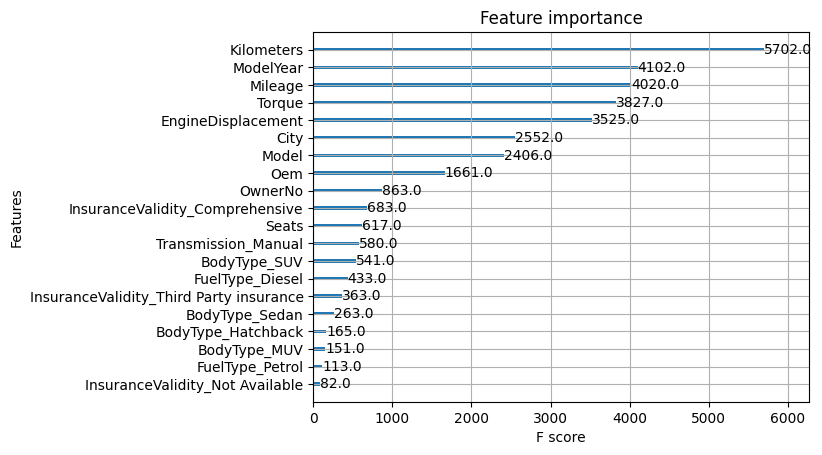

In [200]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(best_estimators_model, importance_type='weight', max_num_features=20)
plt.show()


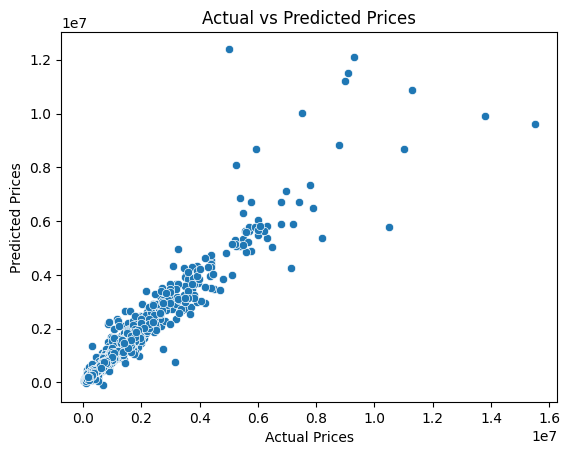

In [202]:
import seaborn as sns

# Assuming you have X_test and y_test for actual prices
y_pred = best_estimators_model.predict(X_test)

# Plot predicted vs actual prices
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


### Residual Analysis

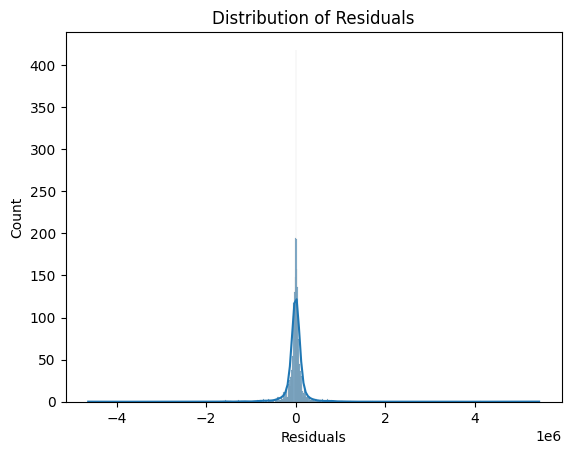

In [201]:
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

### Model Evaluation Metrics

In [ ]:
model_validation(X_train,y_train,X_test,y_test,best_estimators_model)

R^2: 0.916366151282481
RMSE: 324132.5888590543
MAE: 113178.49955503833


c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Model Saving

In [199]:
import joblib

# Save the model
joblib.dump(best_estimators_model, 'best_XG_boosting_model.joblib')


['best_XG_boosting_model.joblib']